In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import numpy as np

2. Graficar las series originales. Analizar si es necesario diferenciarlas para convertirlas en estacionarias 

In [2]:
df_agbarometer = pd.read_csv(
    "series_de_tiempo/data/clean_data/agbarometer_cleaned.csv"
)
print(df_agbarometer.head())

     Bimestre  CondicIones presentes  Expectativas futuras  Ag Barometer
0  2018-11-01                     43                   130            95
1  2019-01-01                     59                   137           106
2  2019-03-01                     69                   126           103
3  2019-05-01                     82                   141           117
4  2019-07-01                    105                   158           137


In [3]:
df_agbarometer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bimestre               41 non-null     object
 1   CondicIones presentes  41 non-null     int64 
 2   Expectativas futuras   41 non-null     int64 
 3   Ag Barometer           41 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


In [4]:
print(df_agbarometer['Bimestre'].head())

0    2018-11-01
1    2019-01-01
2    2019-03-01
3    2019-05-01
4    2019-07-01
Name: Bimestre, dtype: object


In [5]:
df_agbarometer['Bimestre'] = pd.to_datetime(df_agbarometer['Bimestre'], format='%Y-%m-%d')
df_agbarometer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bimestre               41 non-null     datetime64[ns]
 1   CondicIones presentes  41 non-null     int64         
 2   Expectativas futuras   41 non-null     int64         
 3   Ag Barometer           41 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.4 KB


In [6]:
df_agbarometer.set_index('Bimestre', inplace=True)
df_agbarometer.head()

CondicIones presentes  Expectativas futuras  Ag Barometer
Bimestre                                                             
2018-11-01                     43                   130            95
2019-01-01                     59                   137           106
2019-03-01                     69                   126           103
2019-05-01                     82                   141           117
2019-07-01                    105                   158           137

In [7]:
df_agbarometer.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2018-11-01 to 2025-09-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   CondicIones presentes  41 non-null     int64
 1   Expectativas futuras   41 non-null     int64
 2   Ag Barometer           41 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [8]:
data1 = df_agbarometer['Ag Barometer']

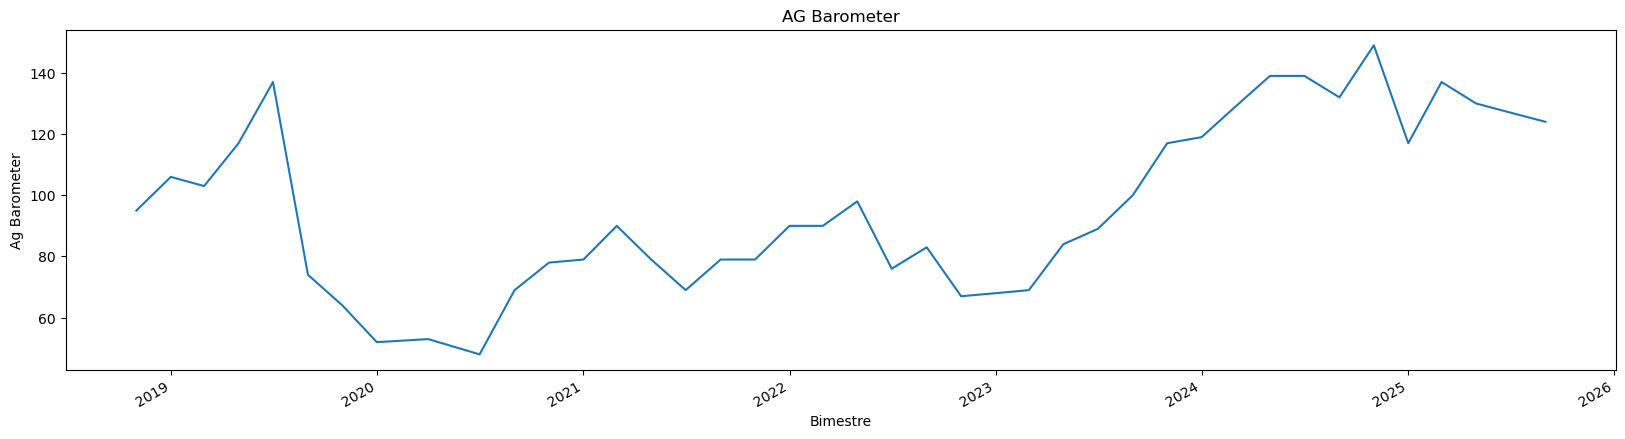

In [9]:
data1.plot(figsize=(20,5), title = "AG Barometer", ylabel = "Ag Barometer", xlabel = "Bimestre")
plt.show()

In [10]:
#ageconomy

df_ageconomy = pd.read_csv(
    "series_de_tiempo/data/clean_data/AgEconomyBarometer_cleaned.csv"
)
print(df_ageconomy.head())

      Month  Year  Purdue/CME Ag Economy Barometer  \
0   October  2015                              116   
1  November  2015                               97   
2  December  2015                              107   
3   January  2016                               98   
4  February  2016                               96   

   Index of Current Conditions  Index of Future Expectations  \
0                          118                           116   
1                           98                            97   
2                          125                            98   
3                           99                            98   
4                           82                           102   

   Farm Capital Investment Index  
0                             67  
1                             51  
2                             75  
3                             52  
4                             56  


In [11]:
df_ageconomy['Date'] = df_ageconomy['Year'].astype(str) + '-' + df_ageconomy['Month'].astype(str).str.zfill(2) + '-01'
df_ageconomy['Date'] = pd.to_datetime(df_ageconomy['Date'])

In [12]:
df_ageconomy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Month                            121 non-null    object        
 1   Year                             121 non-null    int64         
 2   Purdue/CME Ag Economy Barometer  121 non-null    int64         
 3   Index of Current Conditions      121 non-null    int64         
 4   Index of Future Expectations     121 non-null    int64         
 5   Farm Capital Investment Index    121 non-null    int64         
 6   Date                             121 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 6.7+ KB


In [13]:
df_ageconomy.set_index('Date', inplace=True)
df_ageconomy.head()

Month  Year  Purdue/CME Ag Economy Barometer  \
Date                                                          
2015-10-01   October  2015                              116   
2015-11-01  November  2015                               97   
2015-12-01  December  2015                              107   
2016-01-01   January  2016                               98   
2016-02-01  February  2016                               96   

            Index of Current Conditions  Index of Future Expectations  \
Date                                                                    
2015-10-01                          118                           116   
2015-11-01                           98                            97   
2015-12-01                          125                            98   
2016-01-01                           99                            98   
2016-02-01                           82                           102   

            Farm Capital Investment Index  
Date                                       
2015-10-01                             67  
2015-11-01                             51  
2015-12-01                             75  
2016-01-01                             52  
2016-02-01                             56

In [14]:
data2 = df_ageconomy['Purdue/CME Ag Economy Barometer']

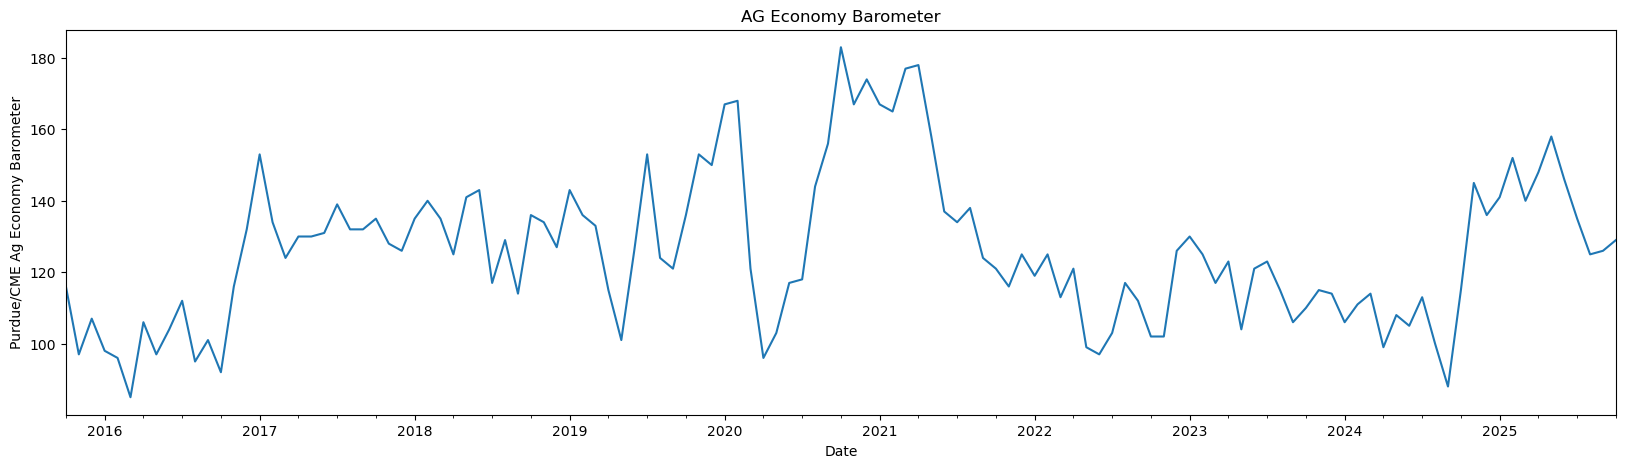

In [15]:
data2.plot(figsize=(20,5), title = "AG Economy Barometer", ylabel = "Purdue/CME Ag Economy Barometer", xlabel = "Date")
plt.show()

In [16]:
#ICG UTDT

df_ICG = pd.read_csv(
    "series_de_tiempo/data/clean_data/ICG_cleaned.csv"
)
print(df_ICG.head())

  indicator        date  value
0       ICG  2001-11-01  1.036
1       ICG  2001-12-01  0.757
2       ICG  2002-01-01  1.357
3       ICG  2002-02-01  0.983
4       ICG  2002-03-01  0.862


In [17]:
df_ICG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   indicator  288 non-null    object 
 1   date       288 non-null    object 
 2   value      288 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.9+ KB


In [18]:
df_ICG['date'] = pd.to_datetime(df_ICG['date'], format='%Y-%m-%d')
df_ICG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   indicator  288 non-null    object        
 1   date       288 non-null    datetime64[ns]
 2   value      288 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.9+ KB


In [19]:
df_ICG.set_index('date', inplace=True)
print(df_ICG.head())

           indicator  value
date                       
2001-11-01       ICG  1.036
2001-12-01       ICG  0.757
2002-01-01       ICG  1.357
2002-02-01       ICG  0.983
2002-03-01       ICG  0.862


In [20]:
data3 = df_ICG['value']

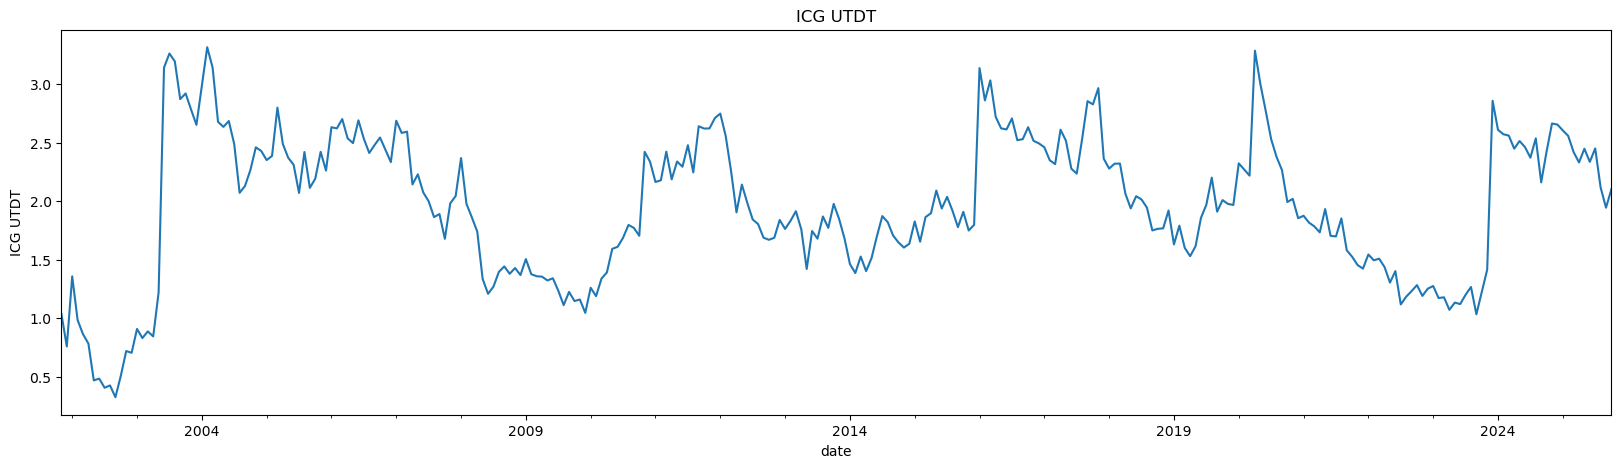

In [21]:
data3.plot(figsize=(20,5), title = "ICG UTDT", ylabel = "ICG UTDT", xlabel = "date")
plt.show()

Graficar la FAS, FAC y FACP de las mismas en un solo gráfico y analizarlas. ¿Qué puede inferir de 
los gráficos?. Justificar con teoría. 

In [22]:
# Grafica de ACF, PACF y autocovarianza
def graficar_acf_pacf_autocovarianza(data, lags=10):
    Y = data.values

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))


    sm.graphics.tsa.plot_acf(Y, lags=lags, ax=ax[0])
    ax[0].set_title('Funcion de autocorrelación (ACF)')

    sm.graphics.tsa.plot_pacf(Y, lags=lags, ax=ax[1])
    ax[1].set_title('Funcion de autocorrelación Parcial (grafico introductorio) (PACF)')

    def autocovariance(series, lag):
        series_mean = np.mean(series)
        n = len(series)
        return np.sum((series[:n-lag] - series_mean) * (series[lag:] - series_mean)) / n

    lags = np.arange(lags)
    autocov = [autocovariance(Y, lag) for lag in lags]

    ax[2].stem(lags, autocov)
    ax[2].set_title('Autocovarianza')
    ax[2].set_xlabel('Lag')
    ax[2].set_ylabel('Autocovarianza')

    plt.tight_layout();
    plt.show();

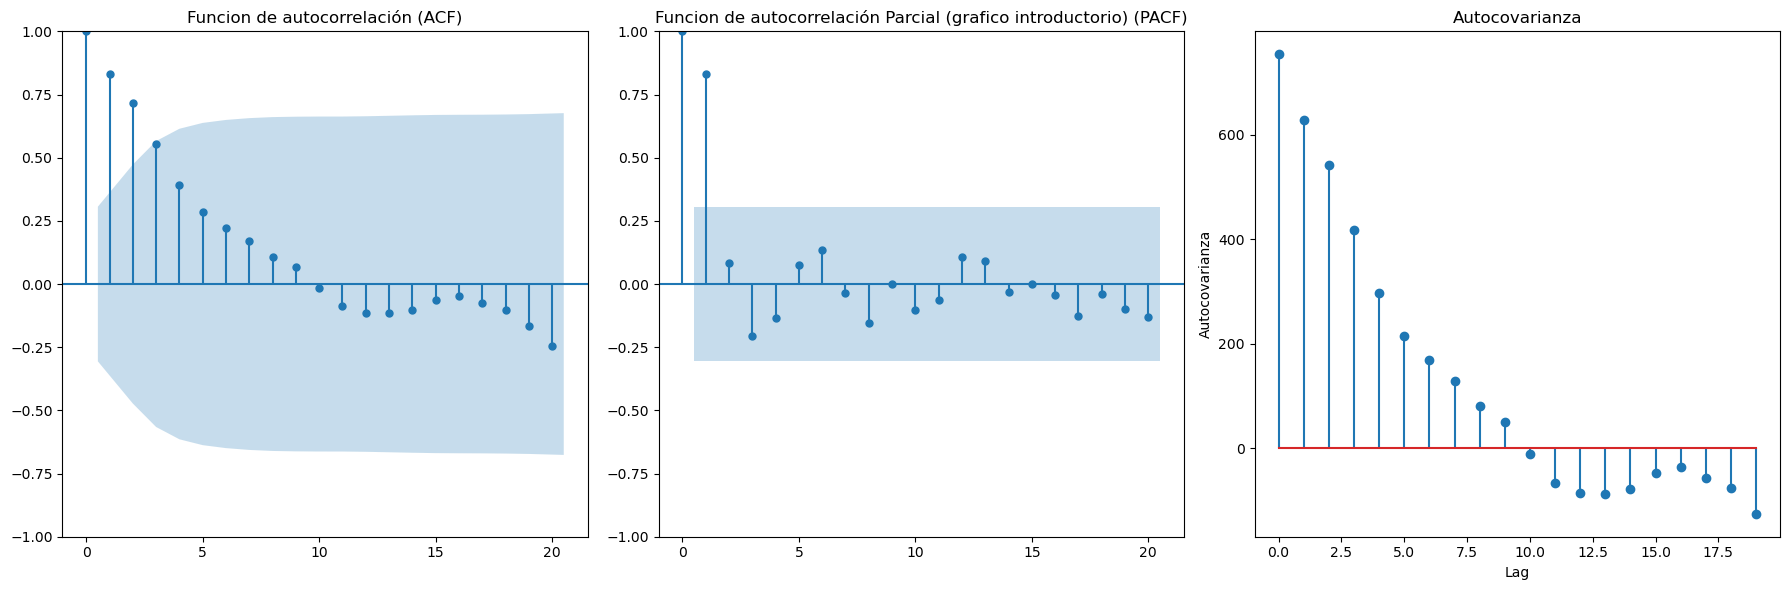

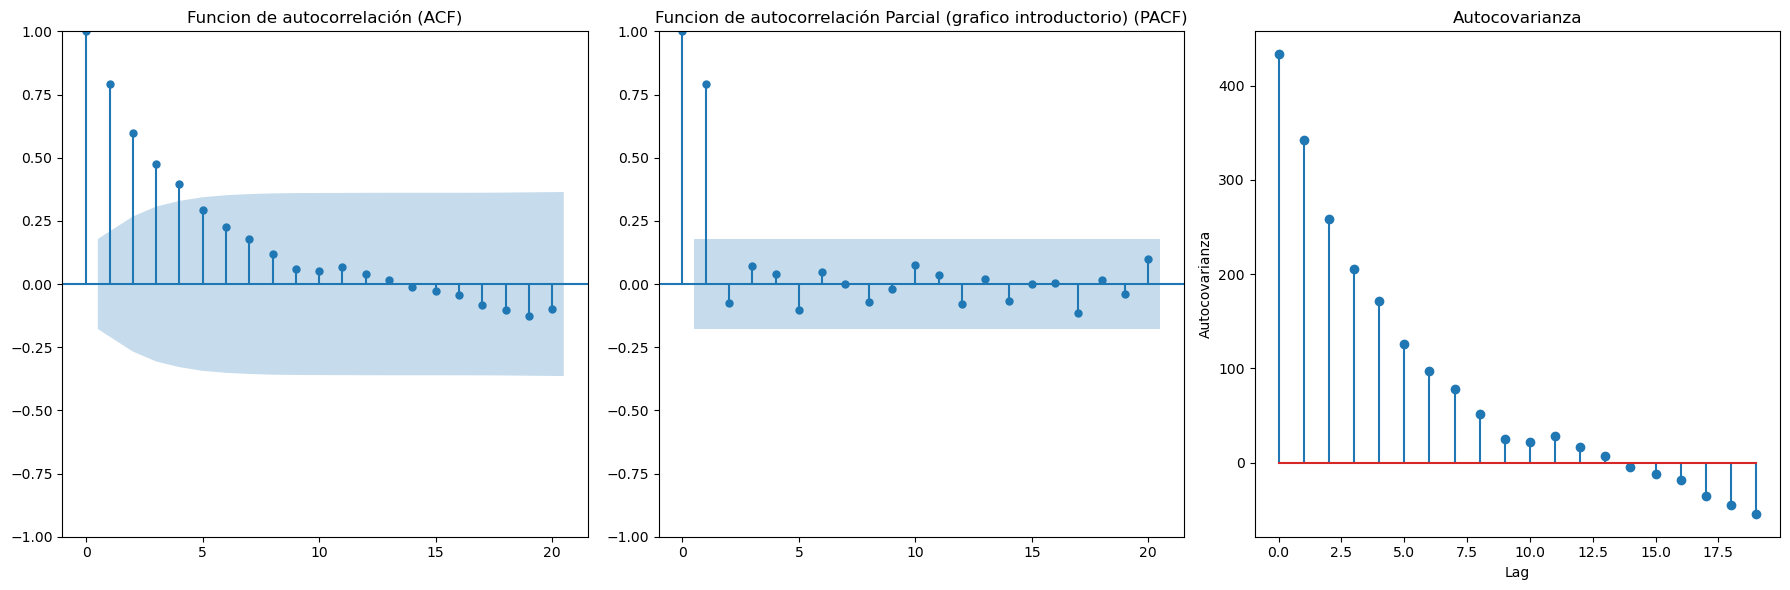

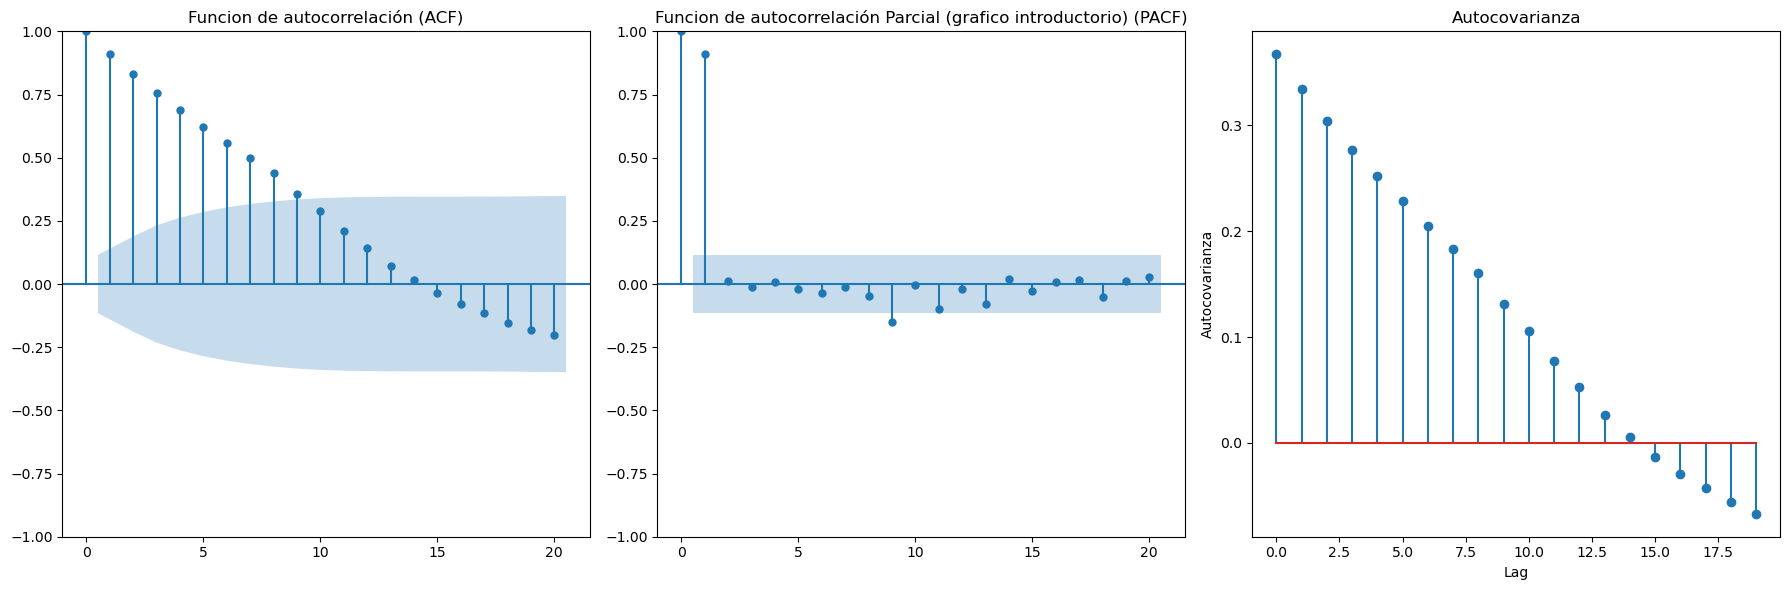

In [23]:
graficar_acf_pacf_autocovarianza(data1, lags=20)
graficar_acf_pacf_autocovarianza(data2, lags=20)
graficar_acf_pacf_autocovarianza(data3, lags=20)

### TP 2

In [ ]:
!pip uninstall -y scipy
!pip install scipy==1.13.0 gensim==4.3.3
!pip install scipy==1.14.0 tsfresh
!pip install h2o
!pip install autoviz
!pip install seaborn
!pip install sweetviz
!pip install tsfresh
!pip install ydata-profiling
!pip -q install h2o

Found existing installation: scipy 1.17.0
Uninstalling scipy-1.17.0:
  Successfully uninstalled scipy-1.17.0


You can safely remove it manually.
You can safely remove it manually.


In [32]:
# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from pandas import DataFrame, concat
from scipy import stats
import time
import h2o
from h2o.automl import H2OAutoML

# ============================================================
# 1. CARGA DE DATOS
# ============================================================

# --- Ag Barometer ---
df_agbarometer = pd.read_csv("series_de_tiempo/data/clean_data/agbarometer_cleaned.csv")
df_agbarometer['Bimestre'] = pd.to_datetime(df_agbarometer['Bimestre'], format='%Y-%m-%d')
df_agbarometer.set_index('Bimestre', inplace=True)
data1 = df_agbarometer['Ag Barometer'].dropna()

# --- Ag Economy Barometer ---
df_ageconomy = pd.read_csv("series_de_tiempo/data/clean_data/AgEconomyBarometer_cleaned.csv")
df_ageconomy['Date'] = (
    df_ageconomy['Year'].astype(str) + '-' +
    df_ageconomy['Month'].astype(str).str.zfill(2) + '-01'
)
df_ageconomy['Date'] = pd.to_datetime(df_ageconomy['Date'])
df_ageconomy.set_index('Date', inplace=True)
data2 = df_ageconomy['Purdue/CME Ag Economy Barometer'].dropna()
data2 = data2.rename("Ag Economy Barometer")

# --- ICG UTDT ---
df_ICG = pd.read_csv("series_de_tiempo/data/clean_data/ICG_cleaned.csv")
df_ICG['date'] = pd.to_datetime(df_ICG['date'], format='%Y-%m-%d')
df_ICG.set_index('date', inplace=True)
data3 = df_ICG['value'].dropna()


In [33]:

# ============================================================
# 2. FUNCIÓN: Serie → Formato supervisado
# ============================================================

def time_series_to_supervised(data, n_lag=1, n_fut=1, selLag=None, selFut=None, dropnan=True):
    if isinstance(data, pd.Series):
        data = data.to_frame()
    n_vars = data.shape[1]
    df = DataFrame(data)
    origNames = df.columns
    cols, names = list(), list()

    cols.append(df.shift(0))
    names += [('%s' % origNames[j]) for j in range(n_vars)]

    n_lag = max(0, n_lag)
    for i in range(n_lag, 0, -1):
        suffix = '(t-%d)' % i
        if selLag is None:
            cols.append(df.shift(i))
            names += [('%s%s' % (origNames[j], suffix)) for j in range(n_vars)]
        else:
            for var in selLag:
                cols.append(df[var].shift(i))
                names += [('%s%s' % (var, suffix))]

    n_fut = max(n_fut, 0)
    for i in range(1, n_fut + 1):
        suffix = '(t+%d)' % i
        if selFut is None:
            cols.append(df.shift(-i))
            names += [('%s%s' % (origNames[j], suffix)) for j in range(n_vars)]
        else:
            for var in selFut:
                cols.append(df[var].shift(-i))
                names += [('%s%s' % (var, suffix))]

    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [34]:
# ============================================================
# 3. FUNCIÓN HELPER: restart H2O limpio
# ============================================================

def restart_h2o():
    try:
        h2o.shutdown(prompt=False)
    except:
        pass
    time.sleep(3)
    h2o.init(max_mem_size="2G")

In [35]:
# ============================================================
# 4. FUNCIÓN PRINCIPAL: AutoML
# ============================================================

def run_automl_serie(serie: pd.Series, nombre: str, target_col: str,
                     n_lag: int = 1, n_fut: int = 1,
                     n_val: int = 10, n_test: int = 10,
                     max_runtime_secs: int = 120):

    print(f"\n{'='*60}")
    print(f" AutoML — {nombre}")
    print(f"{'='*60}")

    # 1) Serie -> formato supervisado
    df_sup = time_series_to_supervised(
        serie, n_lag=n_lag, n_fut=n_fut,
        selLag=None, selFut=[target_col], dropnan=True
    )
    df_sup = df_sup.rename(columns={f"{target_col}(t+{n_fut})": "target"})
    target   = "target"
    features = [col for col in df_sup.columns if col != target]

    # 2) Split temporal
    n_total  = len(df_sup)
    df_train = df_sup.iloc[:n_total - n_val - n_test].copy()
    df_val   = df_sup.iloc[n_total - n_val - n_test : n_total - n_test].copy()
    df_test  = df_sup.iloc[n_total - n_test:].copy()
    print(f"  Train: {len(df_train)} | Val: {len(df_val)} | Test: {len(df_test)}")

    # ── GRÁFICO 1: Split Train / Val / Test ─────────────────────────
    plt.figure(figsize=(14, 4))
    plt.plot(df_train.index, df_train[target], color='blue',       label='Train')
    plt.plot(df_val.index,   df_val[target],   color='orange',     label='Validación')
    plt.plot(df_test.index,  df_test[target],  color='lightcoral', label='Test')
    plt.ylabel(target_col, fontsize=14)
    plt.title(f"{nombre} — Split Train / Val / Test")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3) H2OFrames
    hf_train = h2o.H2OFrame(df_train.reset_index(drop=True))
    hf_val   = h2o.H2OFrame(df_val.reset_index(drop=True))
    hf_test  = h2o.H2OFrame(df_test.reset_index(drop=True))

    # 4) AutoML
    aml = H2OAutoML(
        max_runtime_secs=max_runtime_secs,
        nfolds=0, seed=42, verbosity="info",
        exclude_algos=['StackedEnsemble']
    )
    aml.train(x=features, y=target,
              training_frame=hf_train,
              validation_frame=hf_val)

    # 5) Leaderboard
    print(f"\n  Leaderboard — {nombre}:")
    print(aml.leaderboard.head(10))

    # 6) Métricas
    perf = aml.leader.model_performance(hf_test)
    print(f"\n  RMSE: {perf.rmse():.4f}")
    print(f"  MAE:  {perf.mae():.4f}")

    # 7) Predicciones
    preds      = aml.leader.predict(hf_test).as_data_frame()
    actuals    = df_test[target].values
    predicted  = preds['predict'].values
    test_index = df_test.index

    df_results = pd.DataFrame({
        'ground_truth': actuals,
        'predictions':  predicted
    })

    # MAPE
    mape = np.mean(np.abs((actuals - predicted) / actuals)) * 100
    print(f"  MAPE: {mape:.2f}%")

    # R²
    slope, intercept, r_value, p_value, std_err = stats.linregress(predicted, actuals)
    r2 = r_value ** 2
    print(f"  R²:   {r2:.4f}")

    # ── GRÁFICO 2: Real vs Predicho en test ─────────────────────────
    plt.figure(figsize=(14, 4))
    plt.plot(test_index, actuals,   label='Real')
    plt.plot(test_index, predicted, label='Predicho', linestyle='--')
    plt.ylabel(target_col, fontsize=14)
    plt.title(f"{nombre} — Test | RMSE: {perf.rmse():.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ── GRÁFICO 3: Scatter ───────────────────────────────────────────
    plt.figure(figsize=(5, 5))
    plt.scatter(df_results['predictions'], df_results['ground_truth'], s=5, c='red')
    plt.xlabel('Predicciones', fontsize=14)
    plt.ylabel('Valores Reales', fontsize=14)
    plt.title(f"{nombre} — Scatter | R²: {r2:.4f}")
    plt.tight_layout()
    plt.show()

    # ── GRÁFICO 4: Unificado completo ───────────────────────────────
    plt.figure(figsize=(18, 5))
    plt.plot(df_train.index, df_train[target],
             color='steelblue', linewidth=1.5, label='Train')
    plt.plot(df_val.index, df_val[target],
             color='orange', linewidth=1.5, label='Validación')
    plt.plot(test_index, actuals,
             color='green', linewidth=2, label='Test (real)')
    plt.plot(test_index, predicted,
             color='red', linestyle='--', linewidth=2,
             marker='o', markersize=4, label='Predicción')
    plt.axvline(x=df_val.index[0], color='orange', linestyle=':', linewidth=1.2, alpha=0.8)
    plt.axvline(x=test_index[0],   color='gray',   linestyle=':', linewidth=1.5, label='Inicio test')
    plt.ylabel(target_col, fontsize=14)
    plt.title(f"{nombre} — Completo | RMSE: {perf.rmse():.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # ── GRÁFICO 5: explain() ─────────────────────────────────────────
    print(f"\n  Explicación del modelo ganador — {nombre}:")
    aml.leader.explain(hf_test)

    return aml, perf, df_results, mape


 AutoML — Ag Barometer
  Train: 21 | Val: 8 | Test: 8


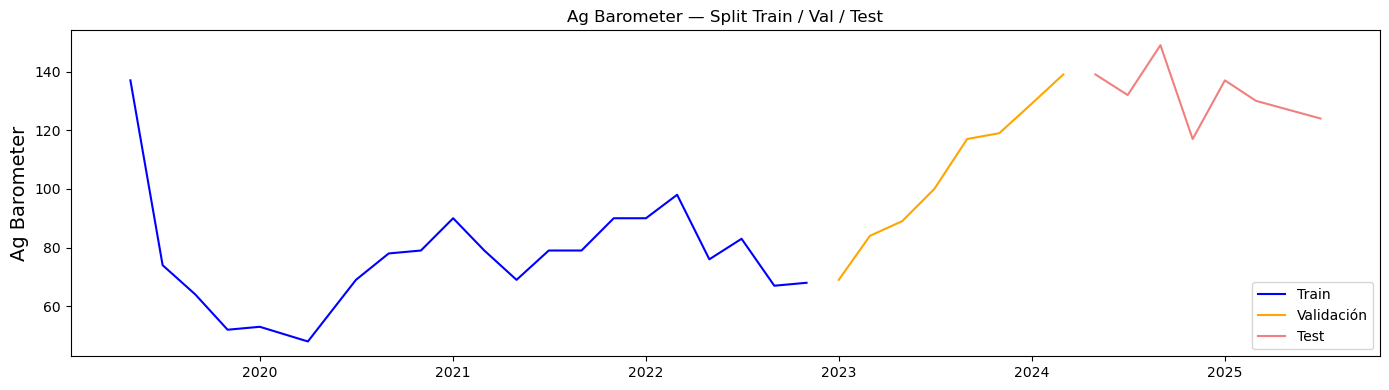

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:26:43.512: Project: AutoML_3_20260218_212643
21:26:43.512: Cross-validation disabled by user: no fold column nor nfolds > 1.
21:26:43.512: Setting stopping tolerance adaptively based on the training frame: 0.05
21:26:43.512: Build control seed: 42
21:26:43.512: training frame: Frame key: AutoML_3_20260218_212643_training_Key_Frame__upload_a3e85a1e7d7c7fb4f704b03ab49a4f8e.hex    cols: 5    rows: 21  chunks: 1    size: 445  checksum: -729008272176
21:26:43.512: validation frame: Frame key: Key_Frame__upload_ad7fa2e5ffb6f33cf7813ea7c98a433c.hex    cols: 5    rows: 8  chunks: 1    size: 380  checksum: -470375826372
21:26:43.512: leaderboard frame: Frame key: Key_Frame__upload_ad7fa2e5ffb6

c:\Users\nmengoni.WIENER-LAB\AppData\Local\miniconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


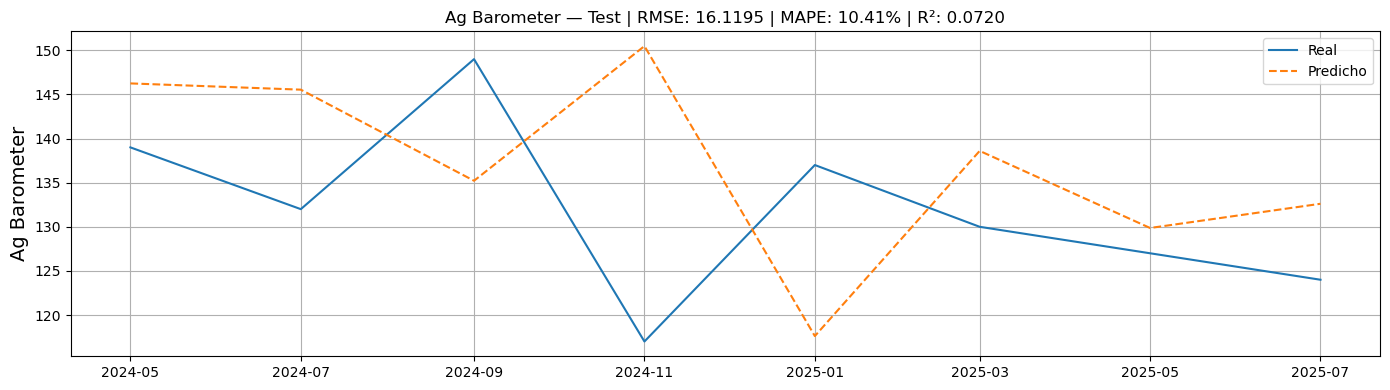

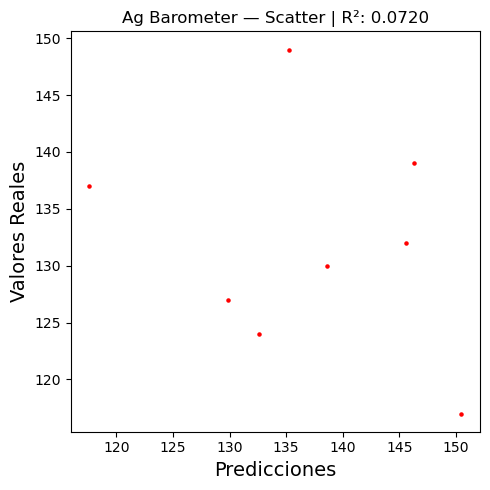

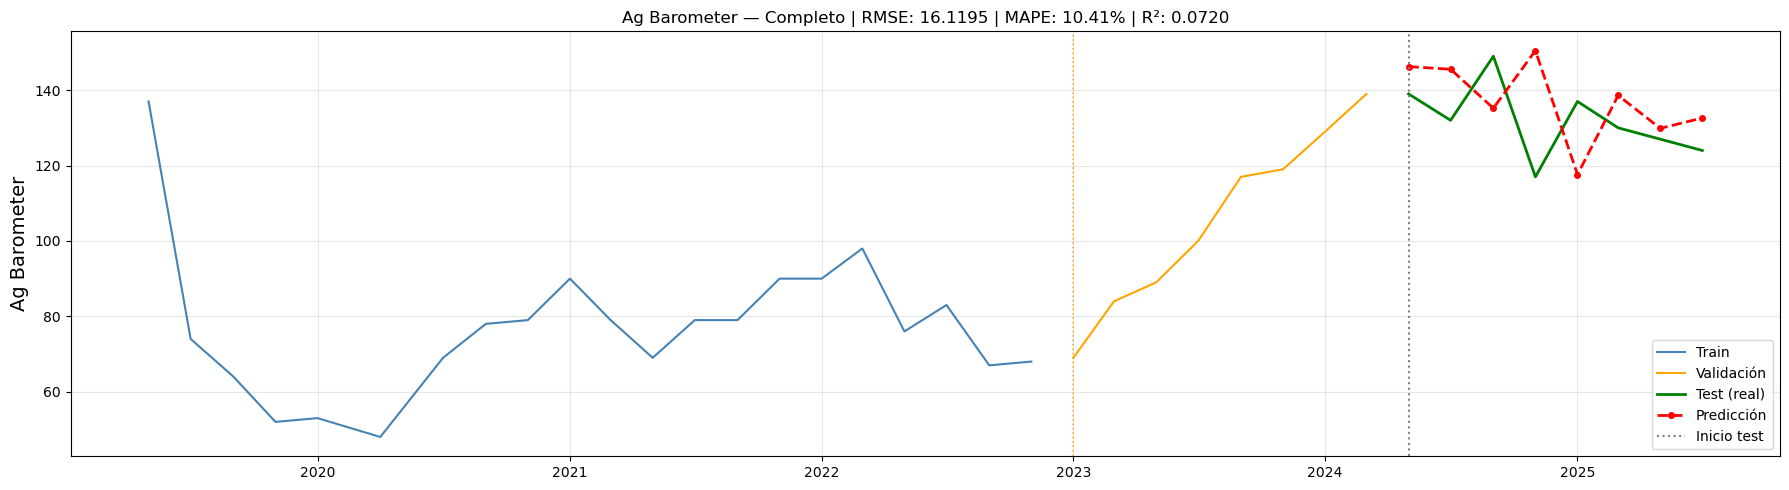


  Explicación del modelo ganador — Ag Barometer:


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

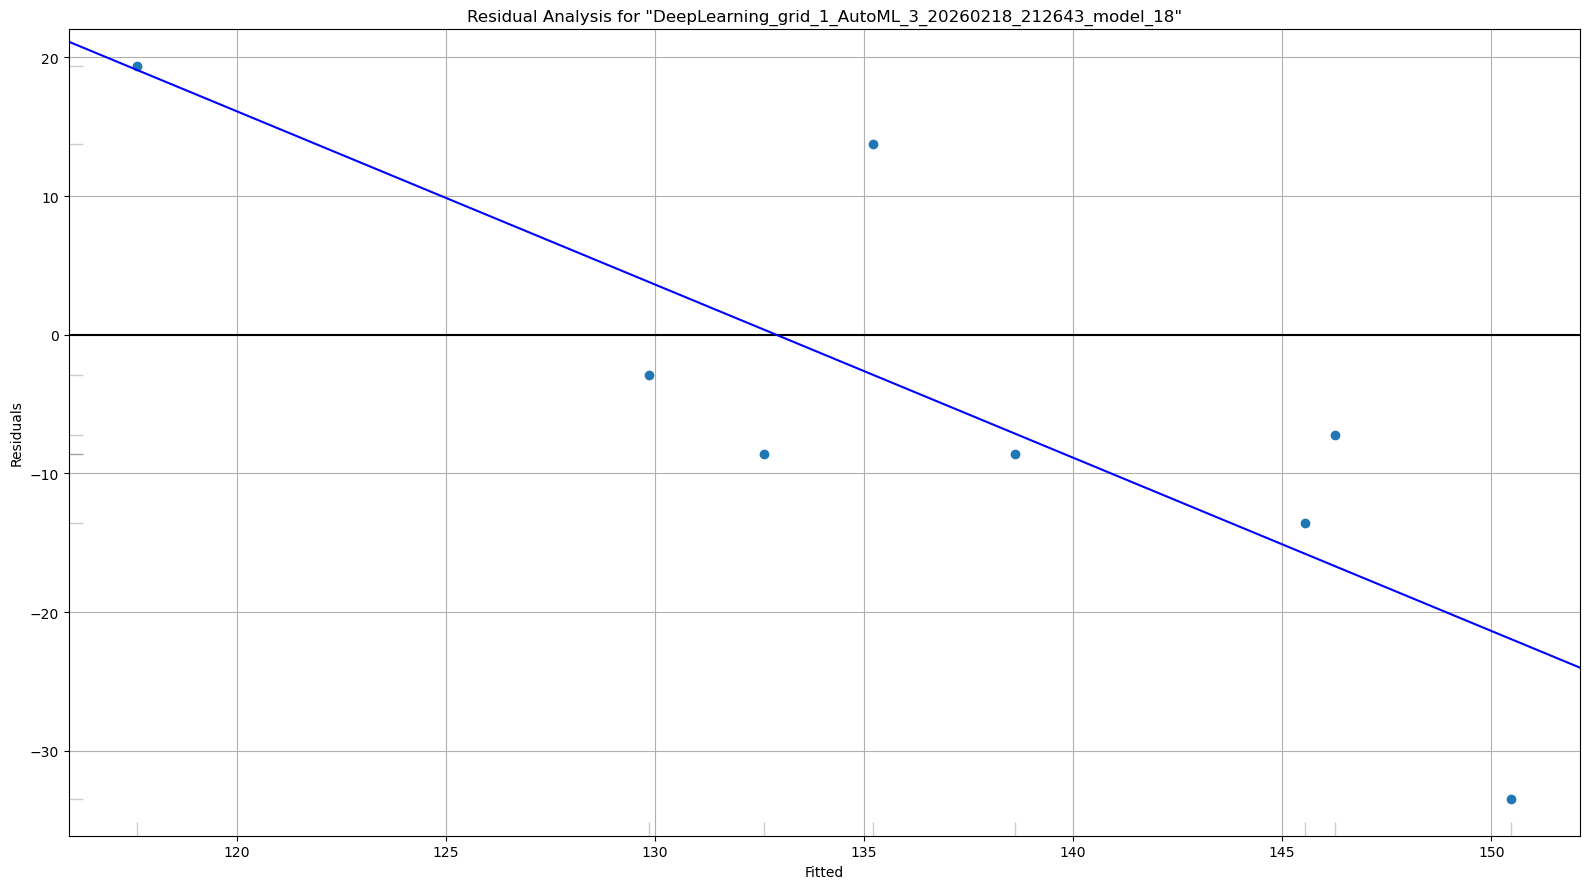

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

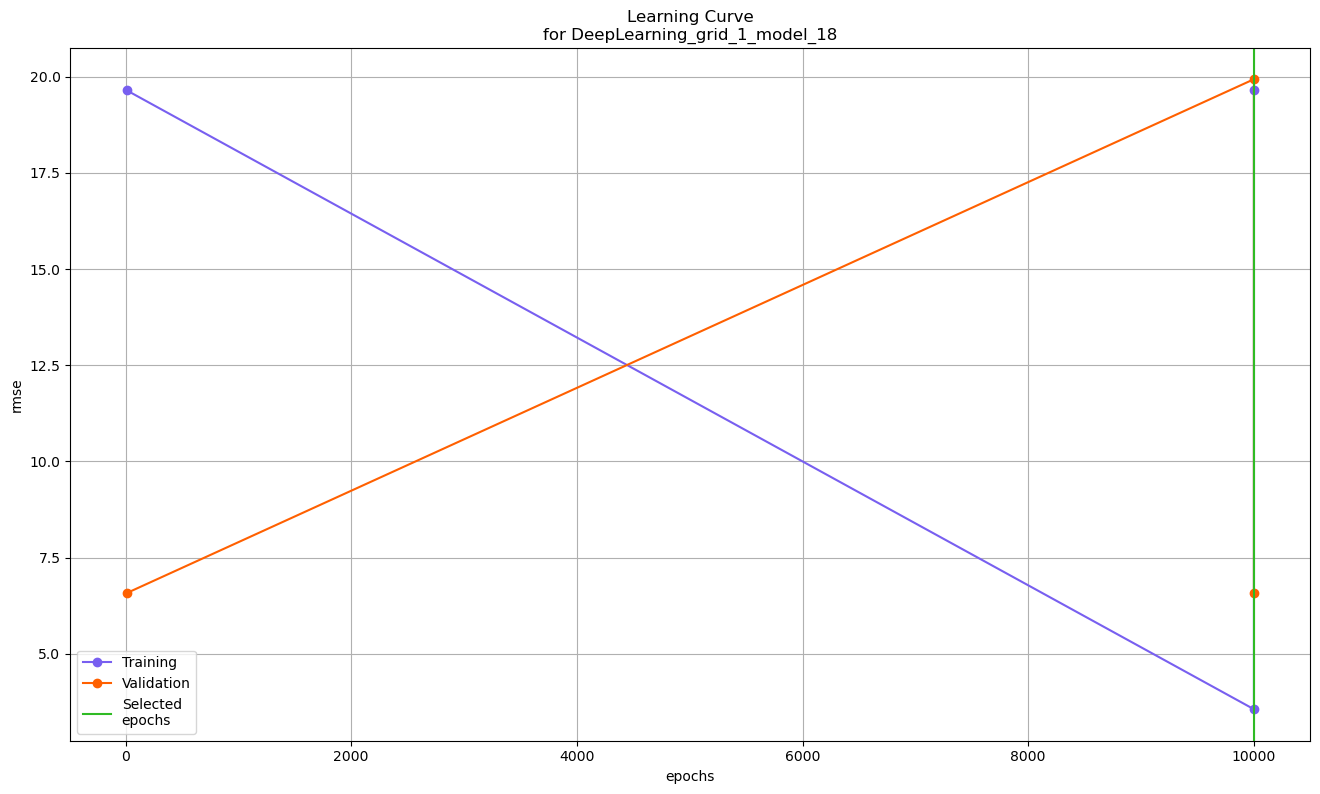

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

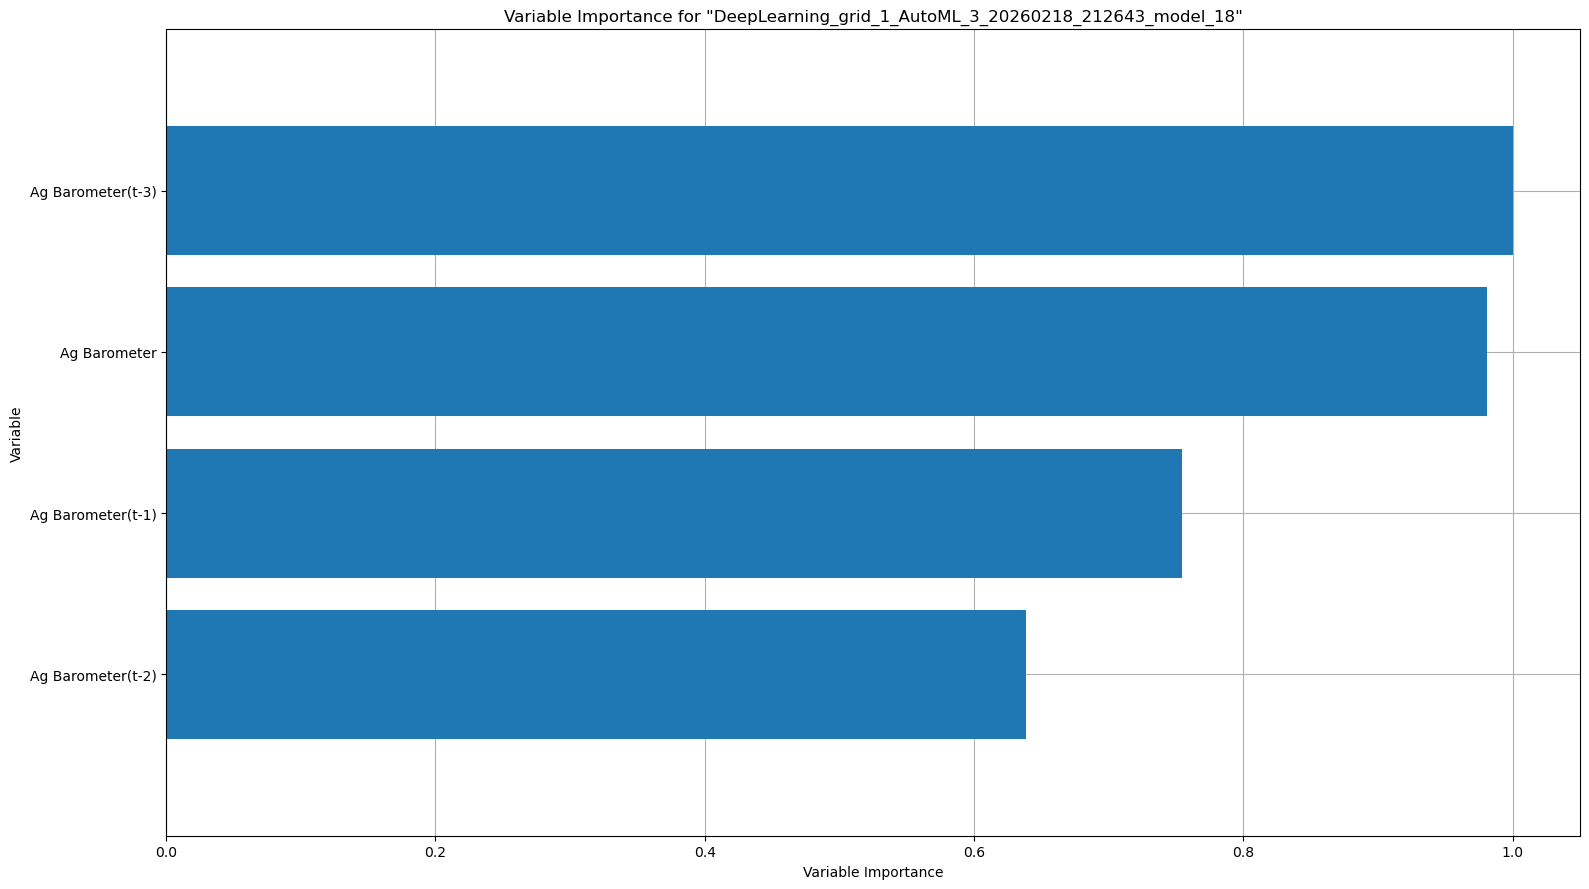

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

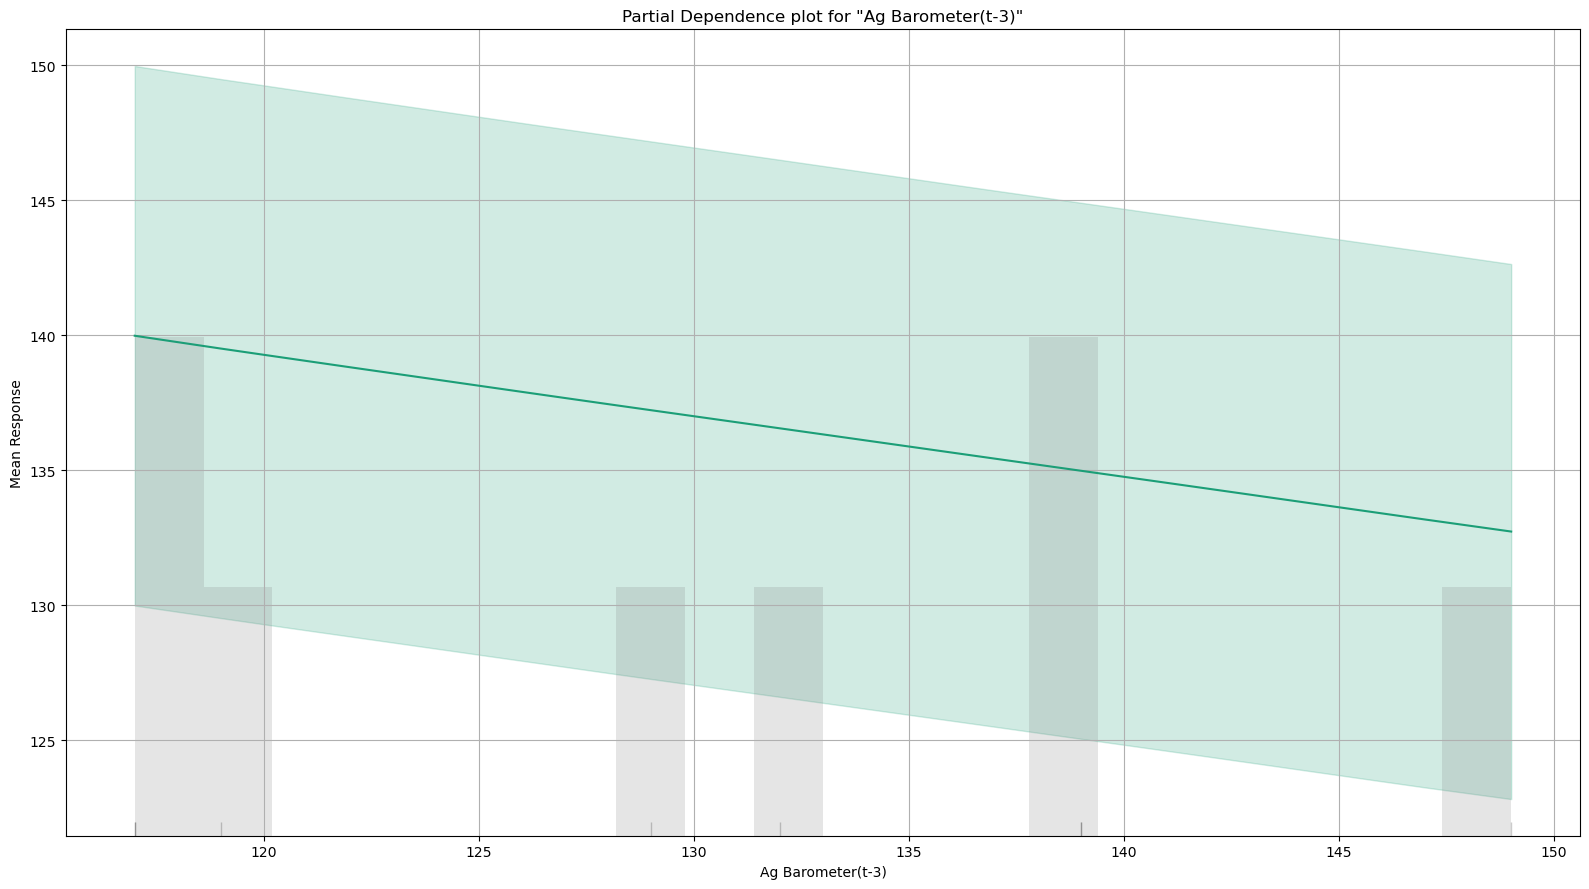

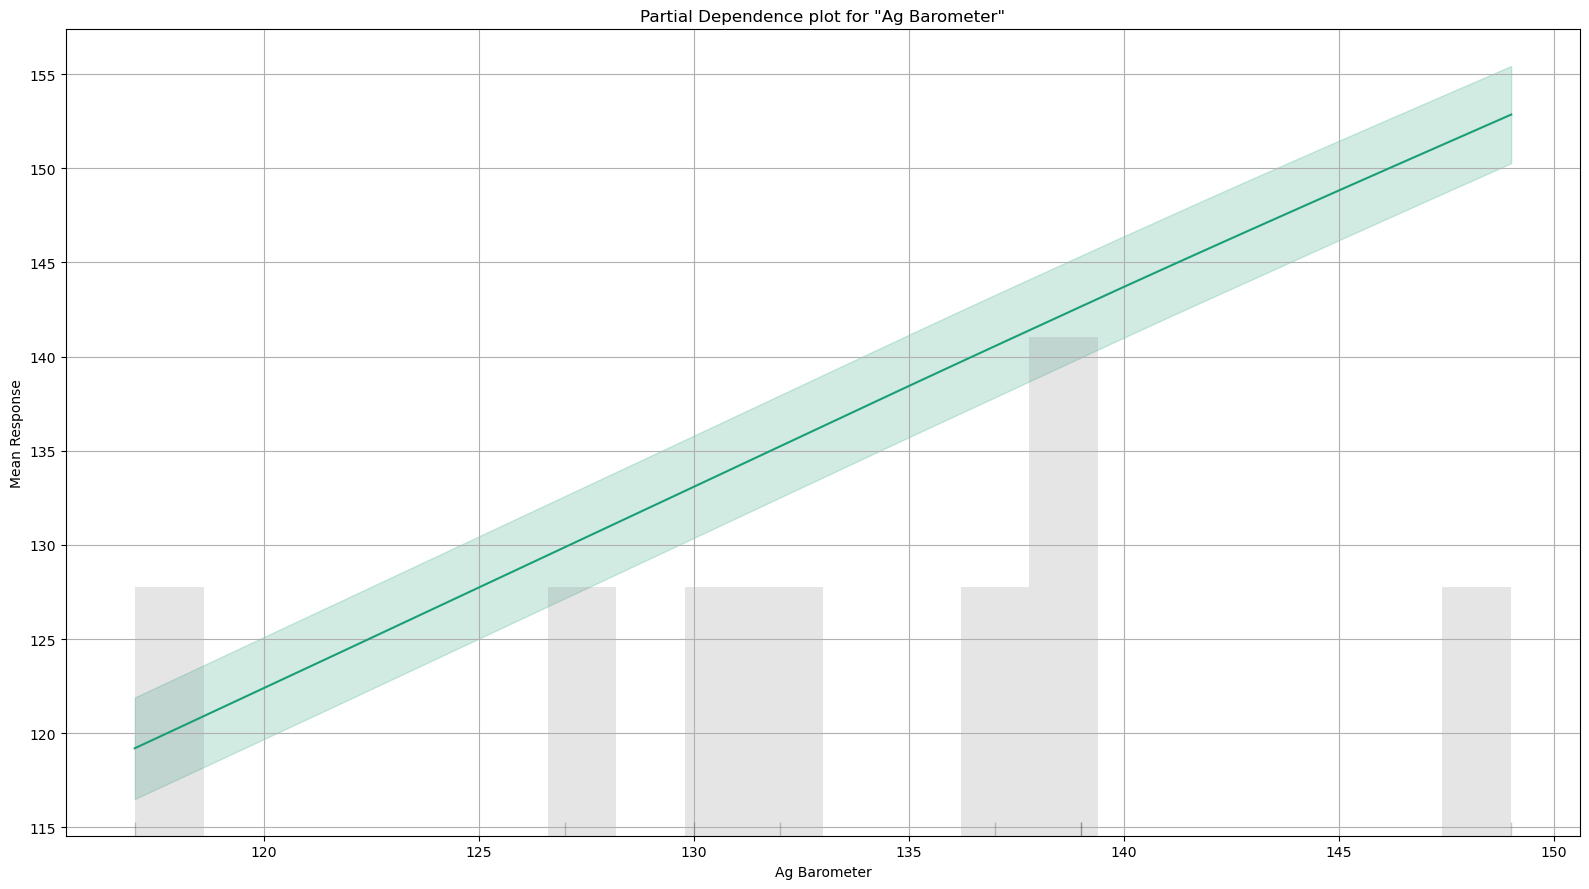

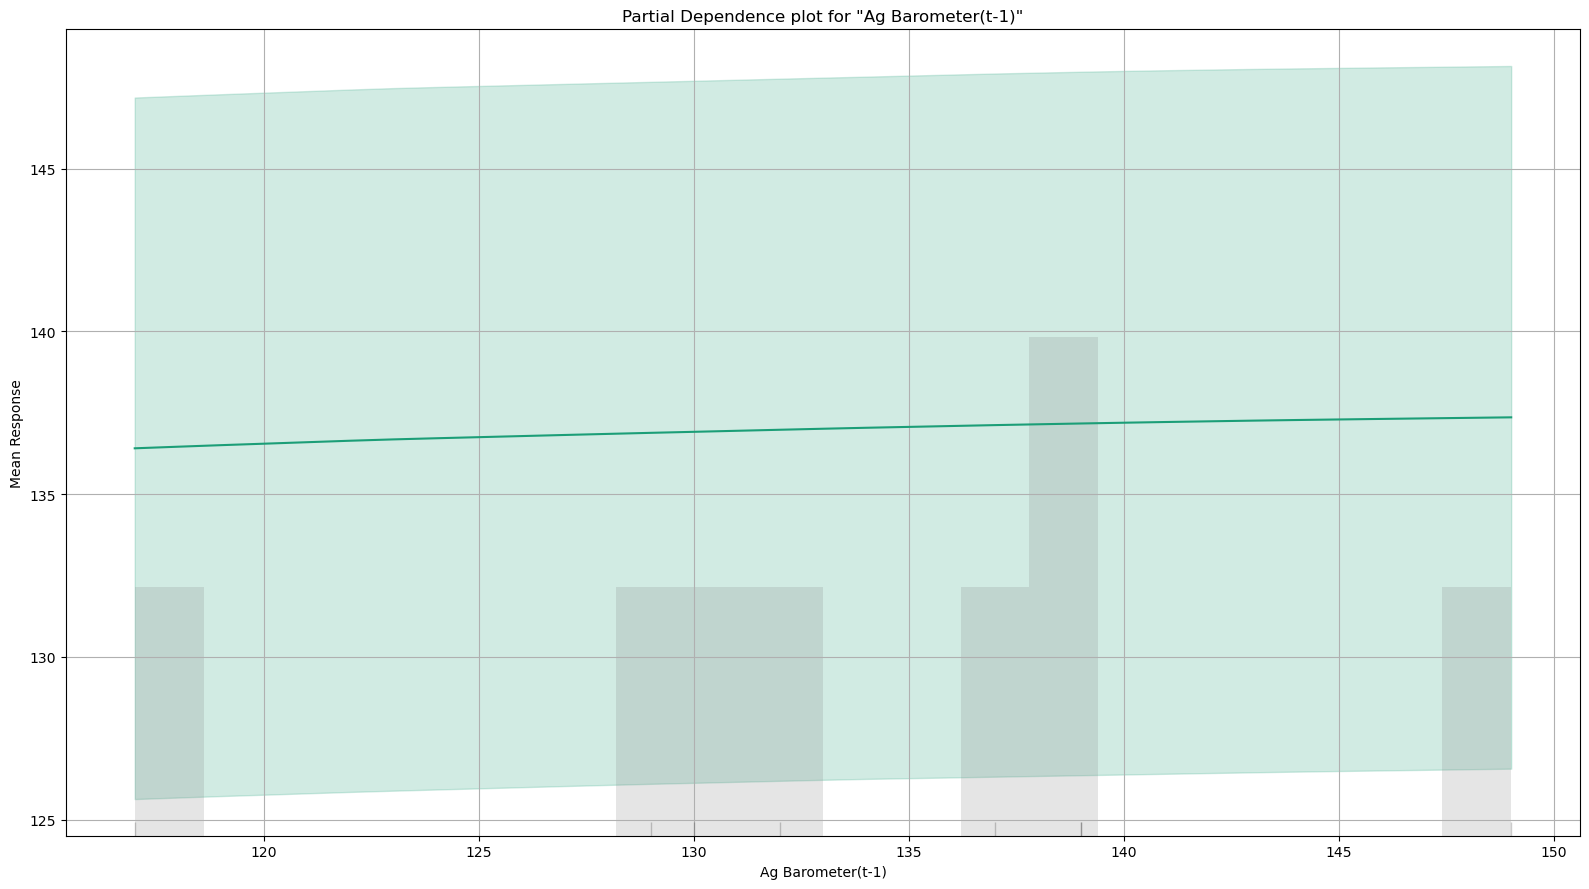

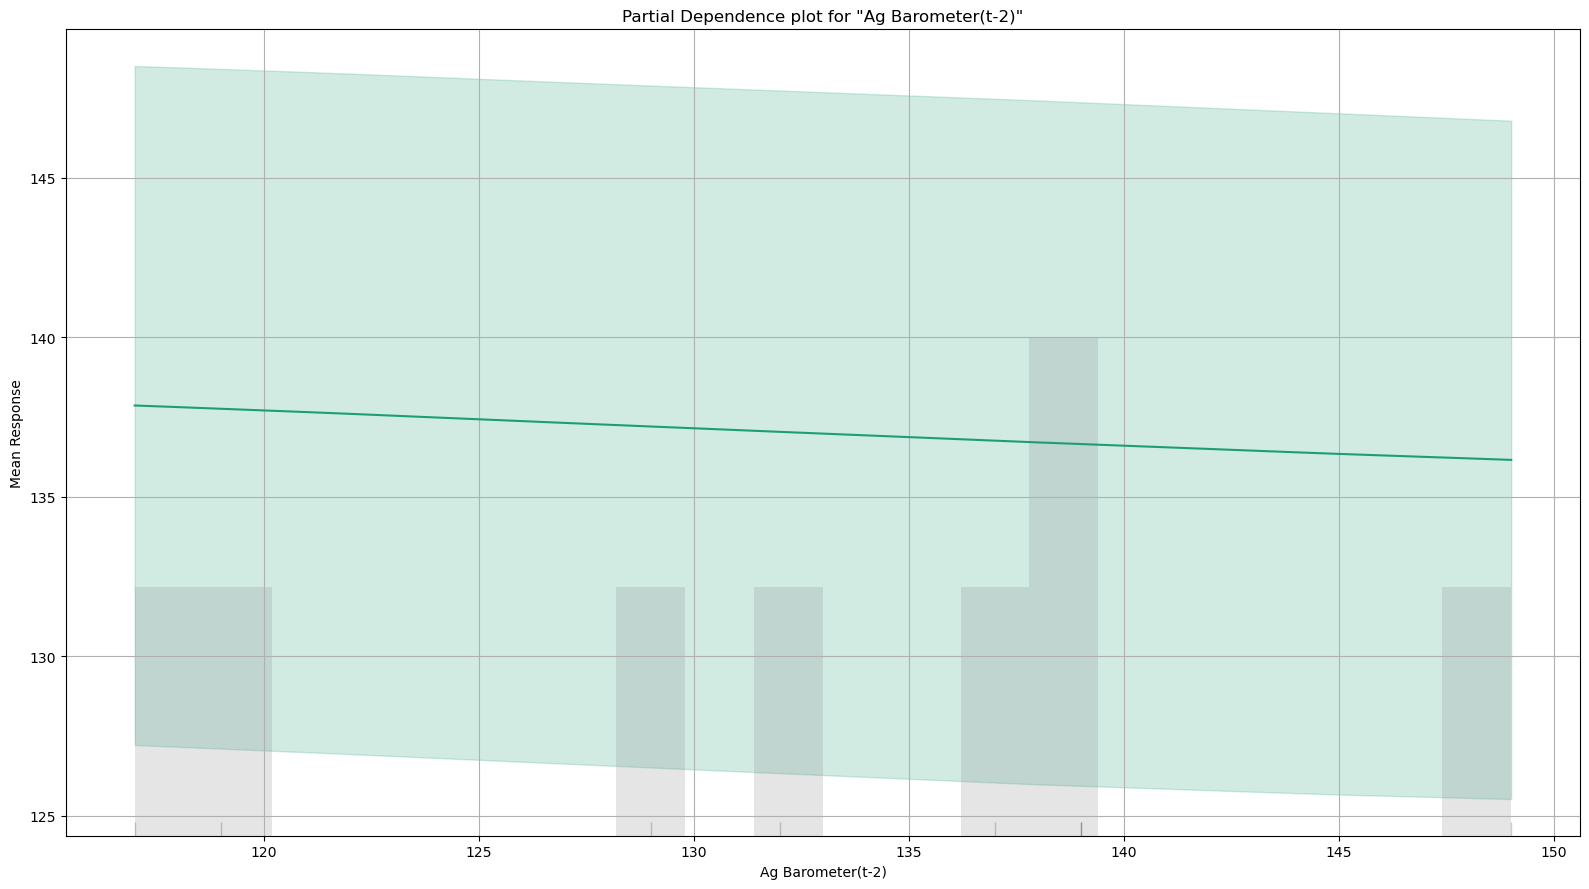

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

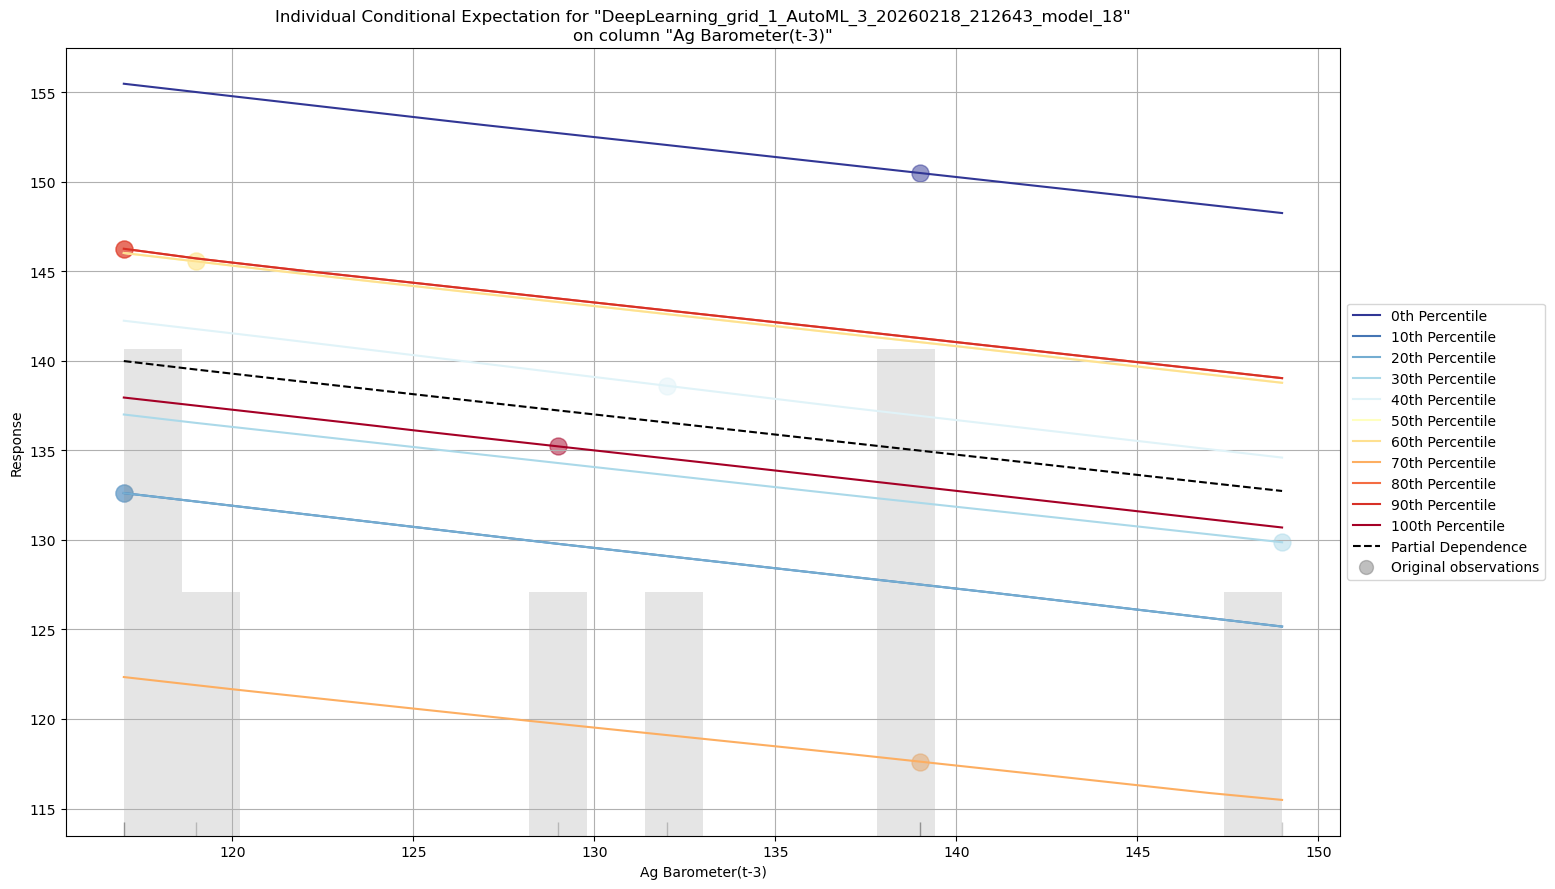

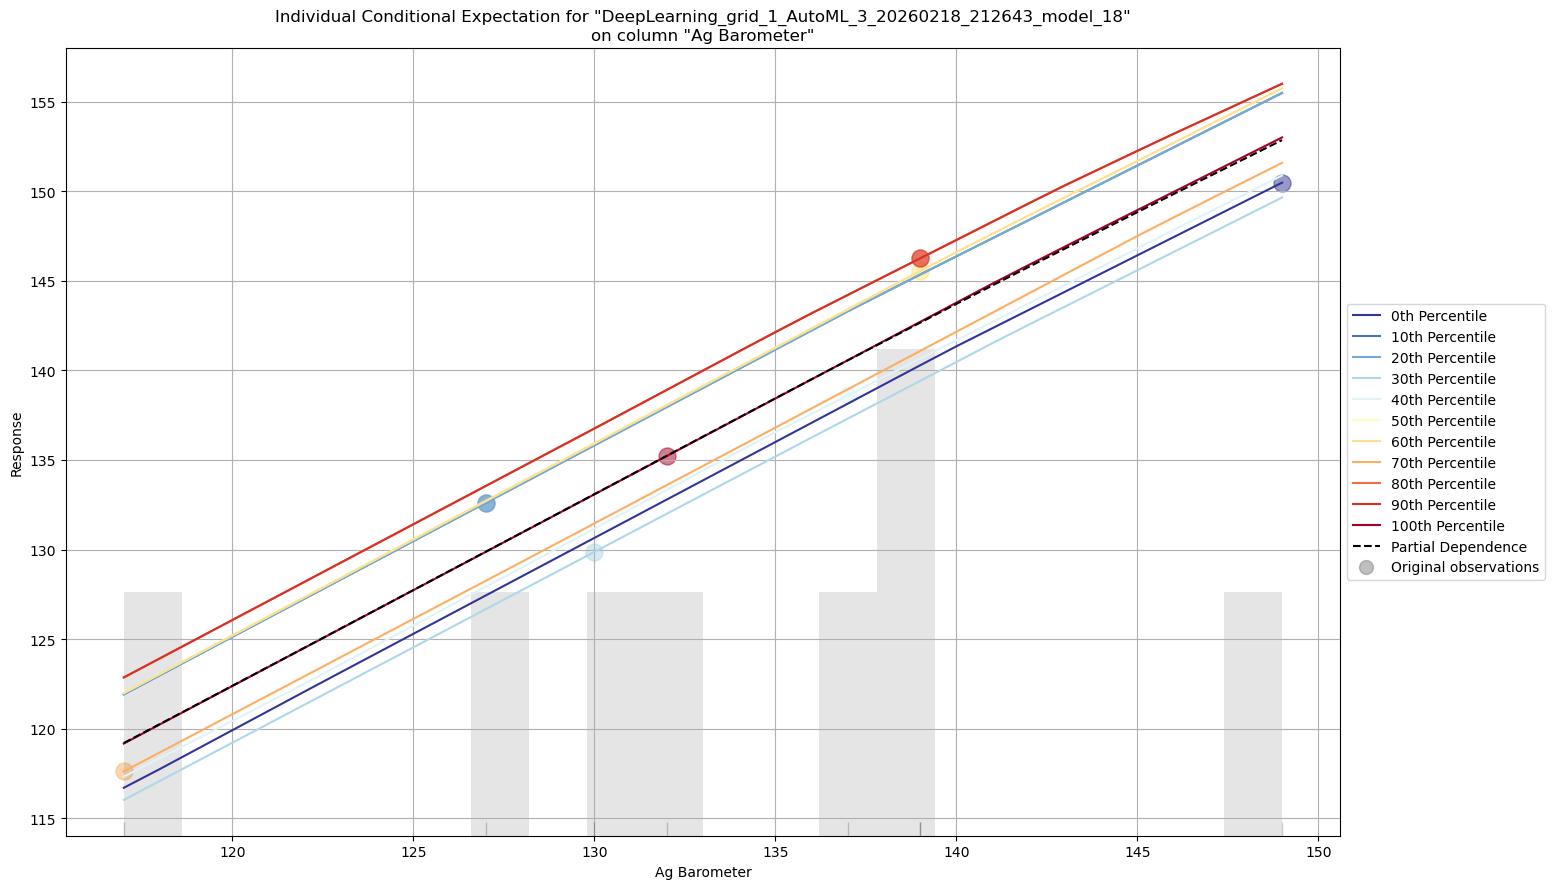

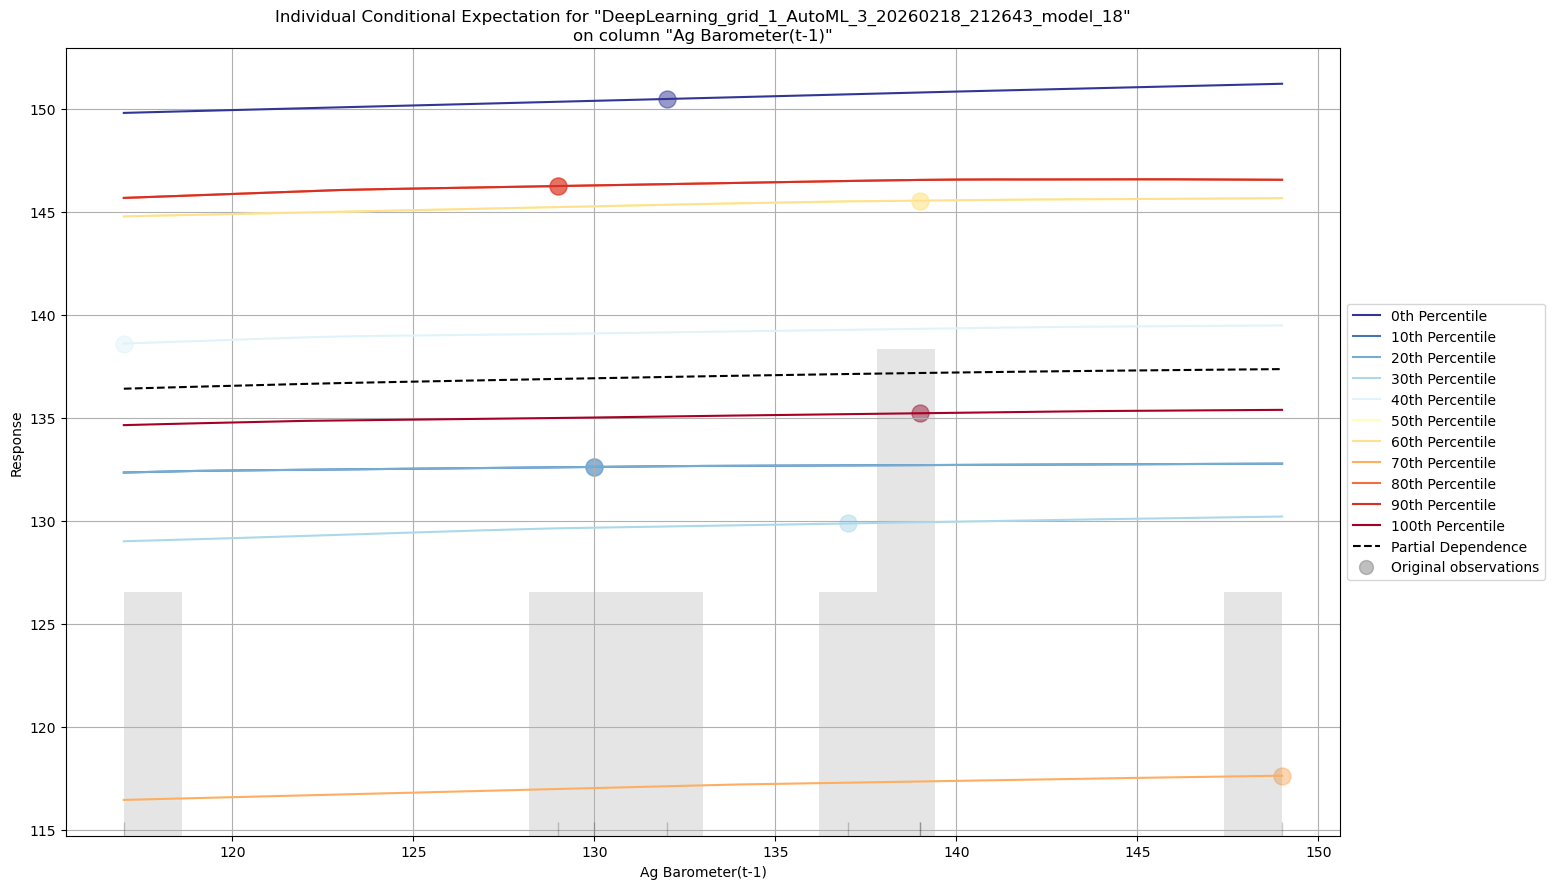

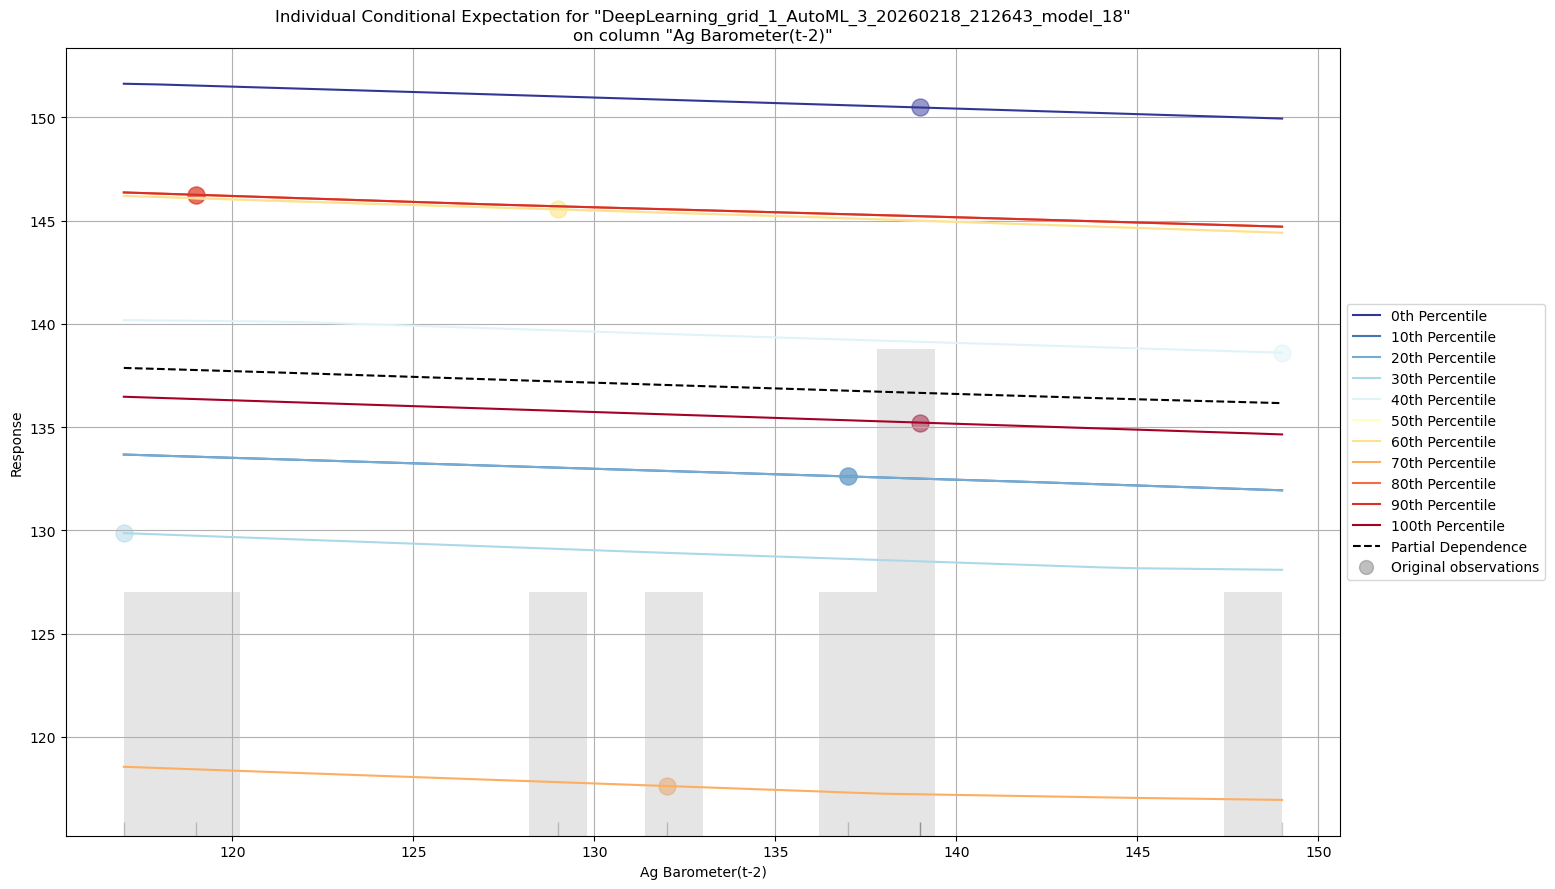

In [36]:
# ============================================================
# 5. SERIE 1 — Ag Barometer (8 val / 8 test)
# ============================================================
aml1, perf1, results1, mape1 = run_automl_serie(
    serie=data1,
    nombre="Ag Barometer",
    target_col="Ag Barometer",
    n_lag=3, n_fut=1,
    n_val=8, n_test=8,
    max_runtime_secs=120
)


 AutoML — Ag Economy Barometer
  Train: 68 | Val: 24 | Test: 25


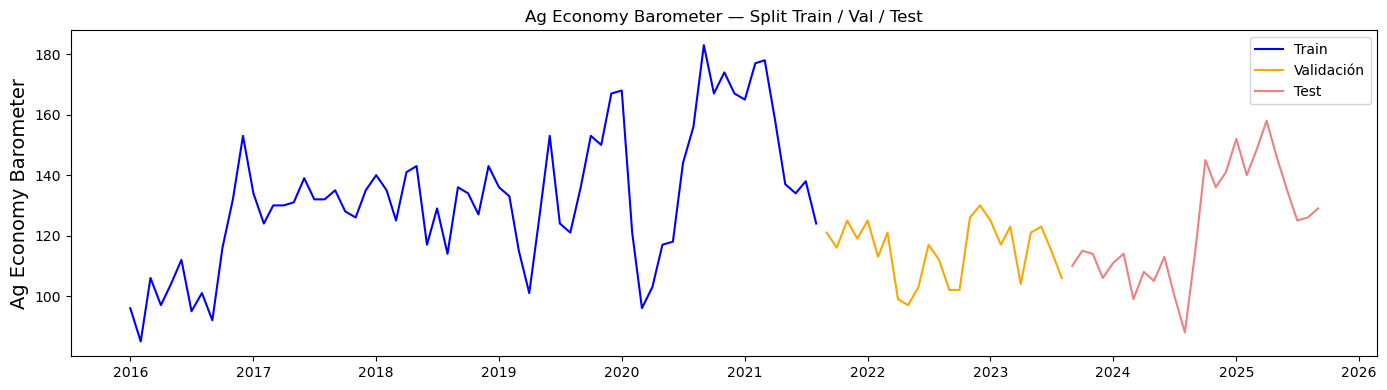

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:28:58.635: Project: AutoML_4_20260218_212858
21:28:58.635: Cross-validation disabled by user: no fold column nor nfolds > 1.
21:28:58.635: Setting stopping tolerance adaptively based on the training frame: 0.05
21:28:58.635: Build control seed: 42
21:28:58.636: training frame: Frame key: AutoML_4_20260218_212858_training_Key_Frame__upload_b6d2b5c857724592f3fef0a581cc4504.hex    cols: 5    rows: 68  chunks: 1    size: 680  checksum: 2163639142440
21:28:58.636: validation frame: Frame key: Key_Frame__upload_81214c55f390b2e32c2437b866854e41.hex    cols: 5    rows: 24  chunks: 1    size: 460  checksum: 221251597080
21:28:58.636: leaderboard frame: Frame key: Key_Frame__upload_81214c55f390

c:\Users\nmengoni.WIENER-LAB\AppData\Local\miniconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


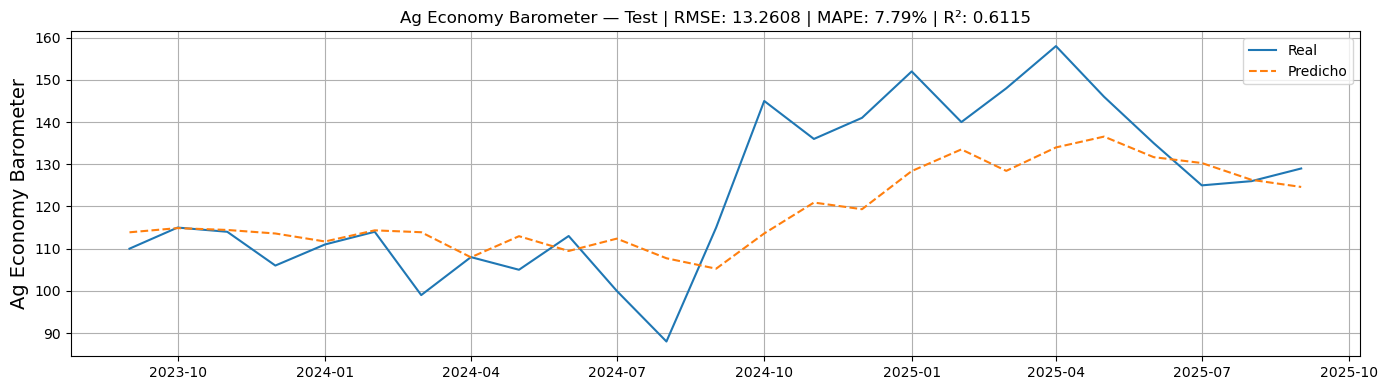

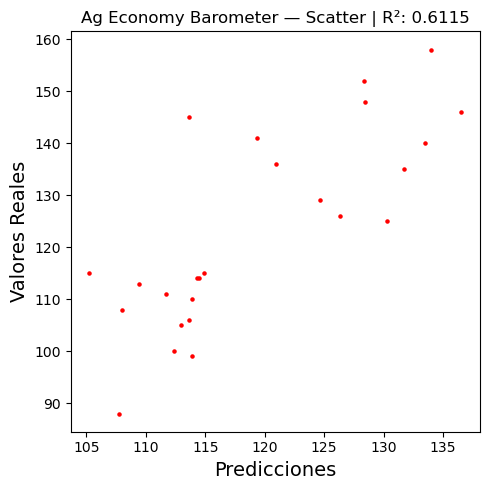

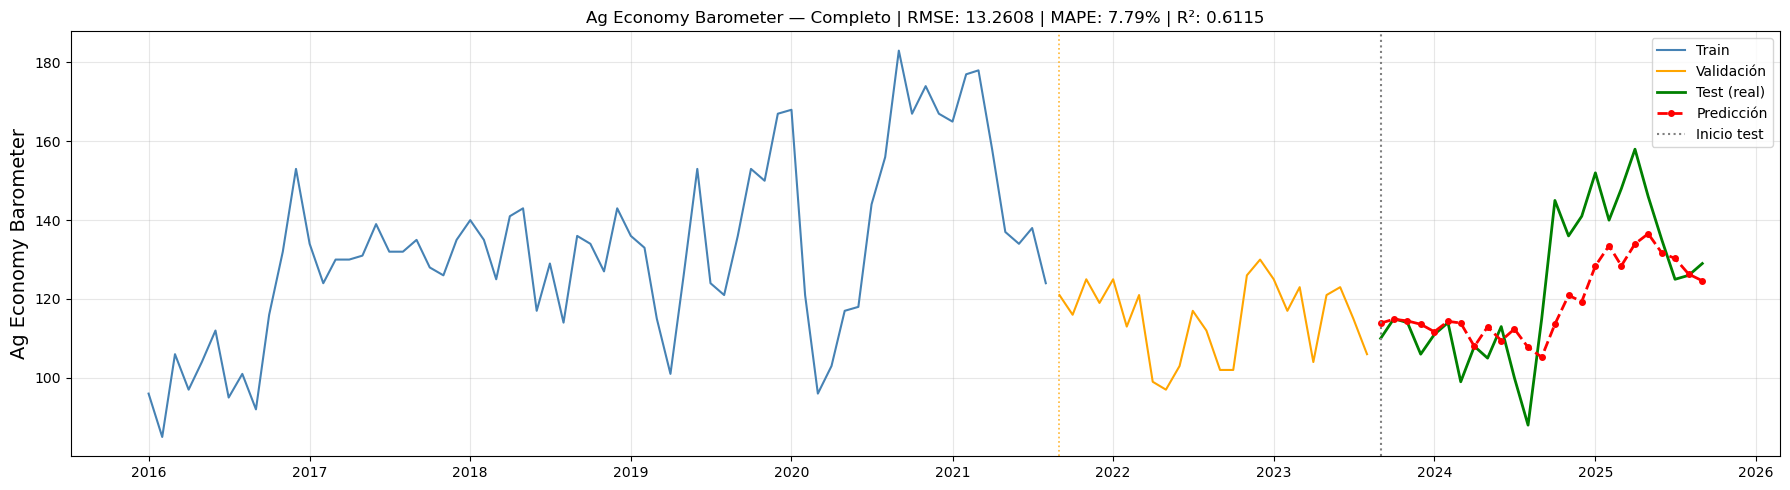


  Explicación del modelo ganador — Ag Economy Barometer:


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

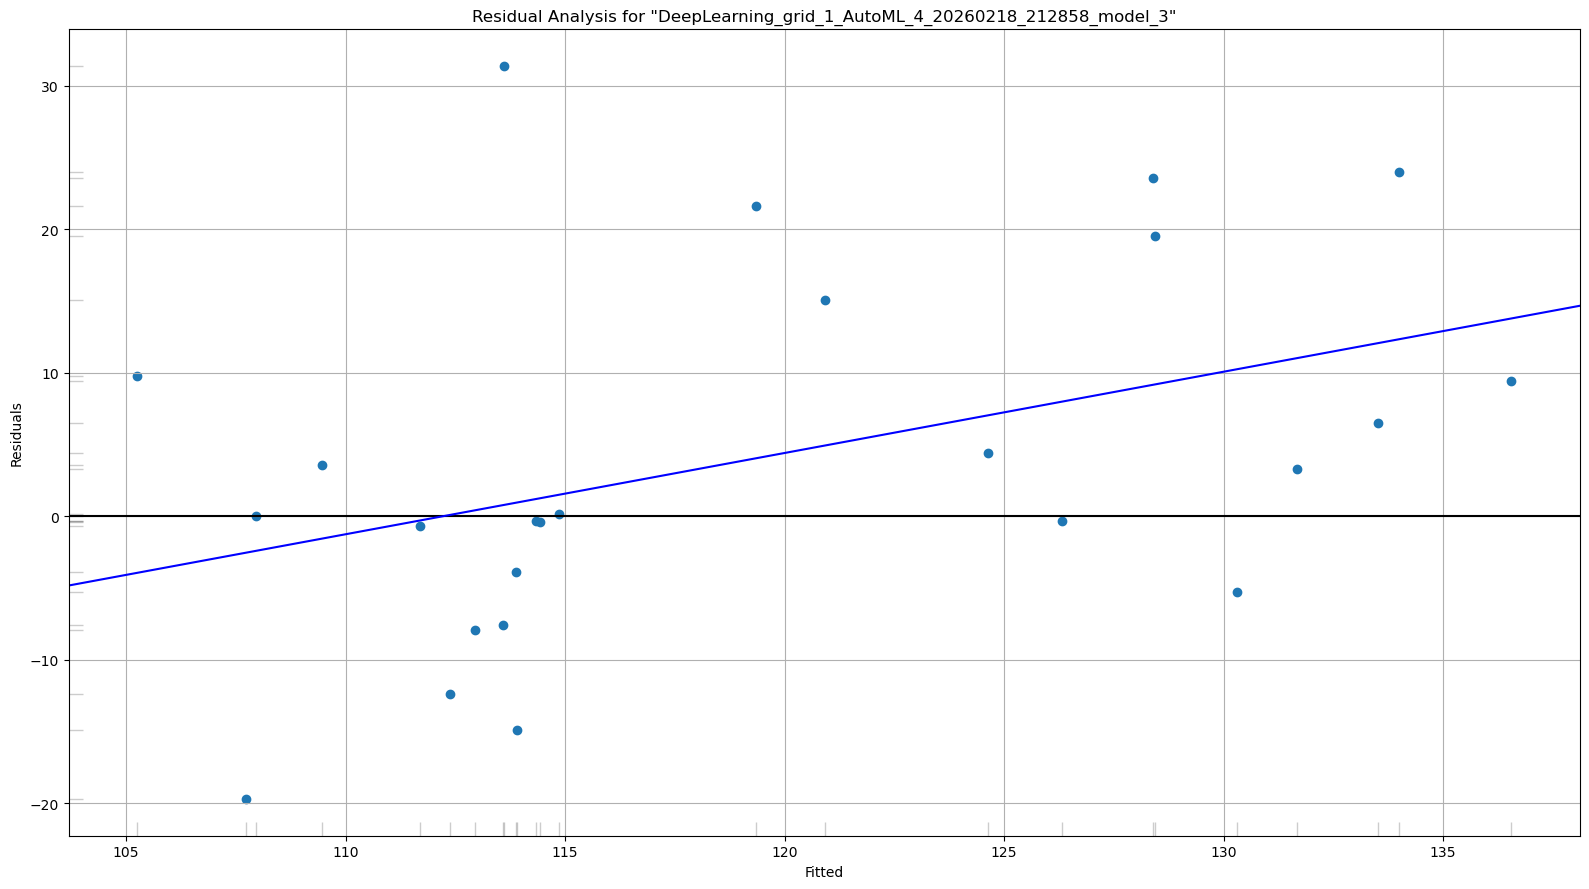

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

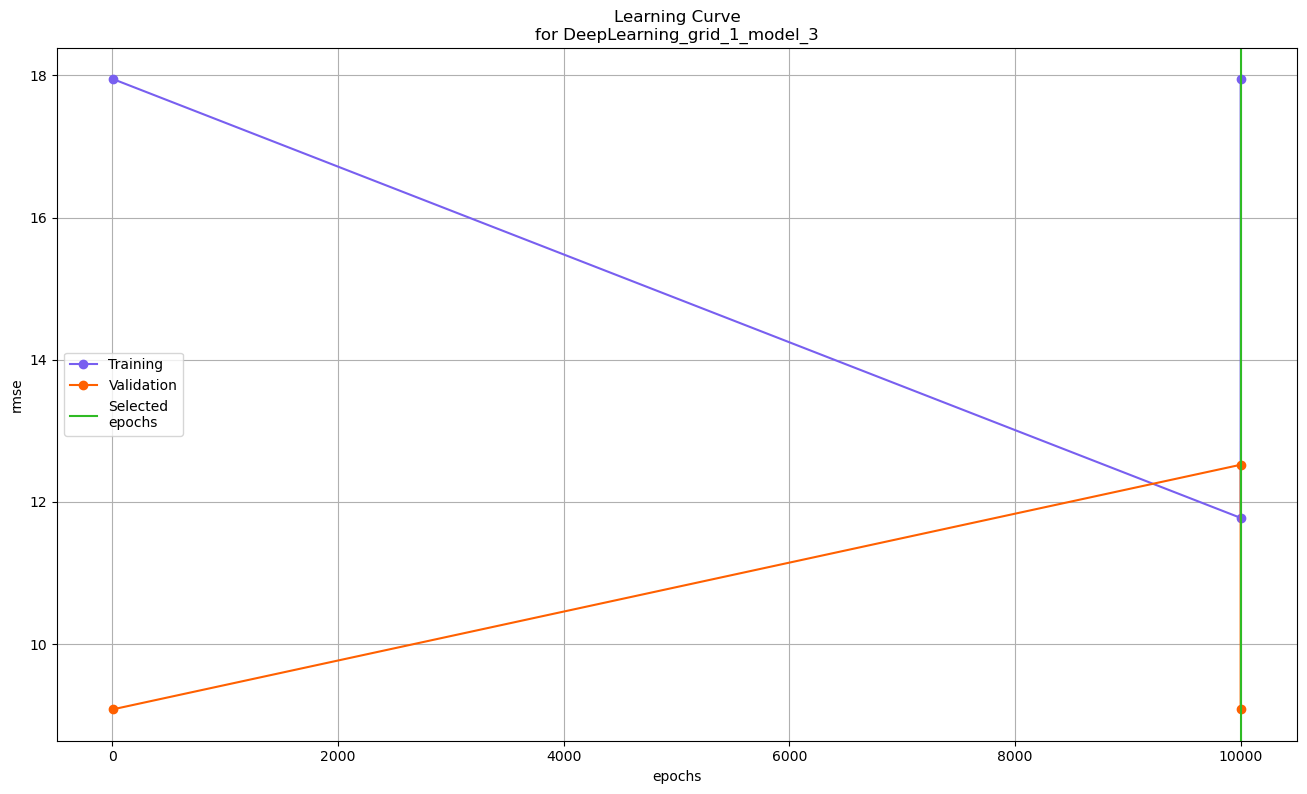

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

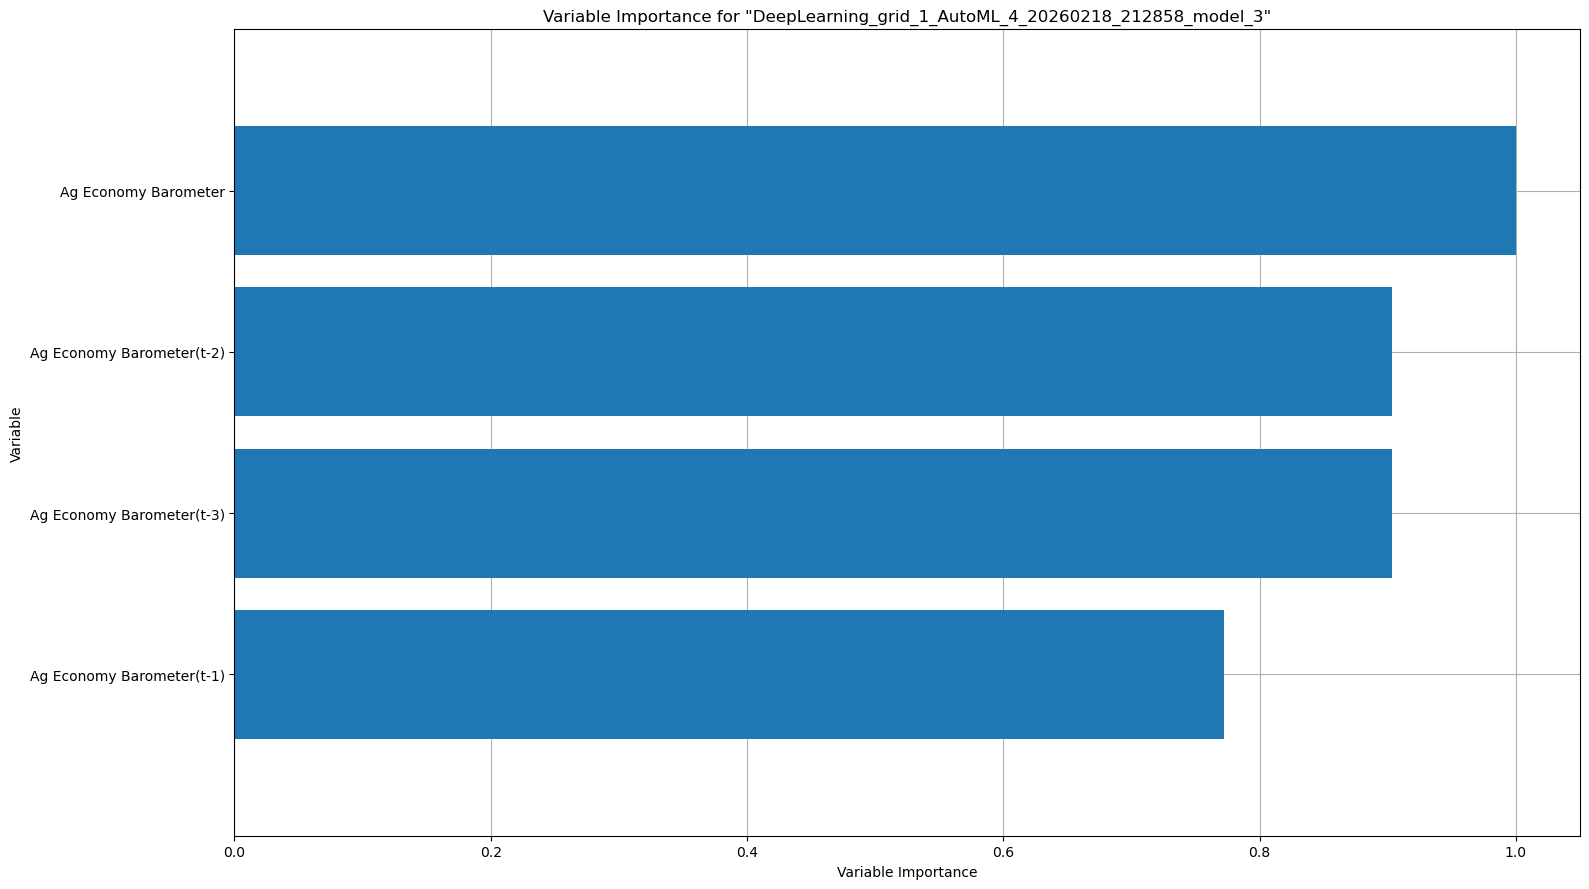

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

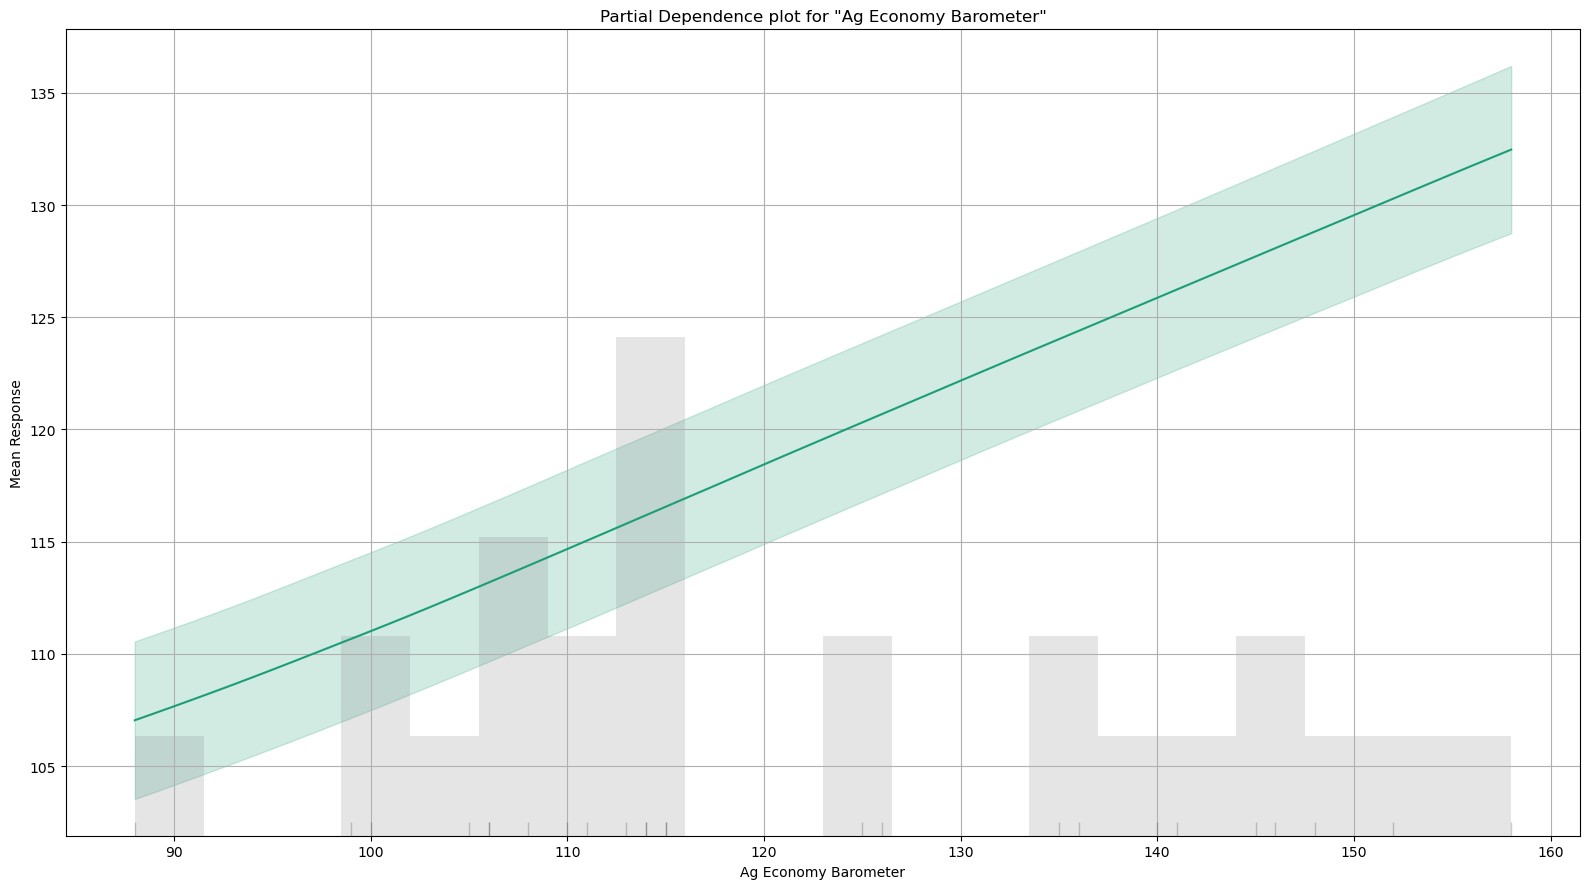

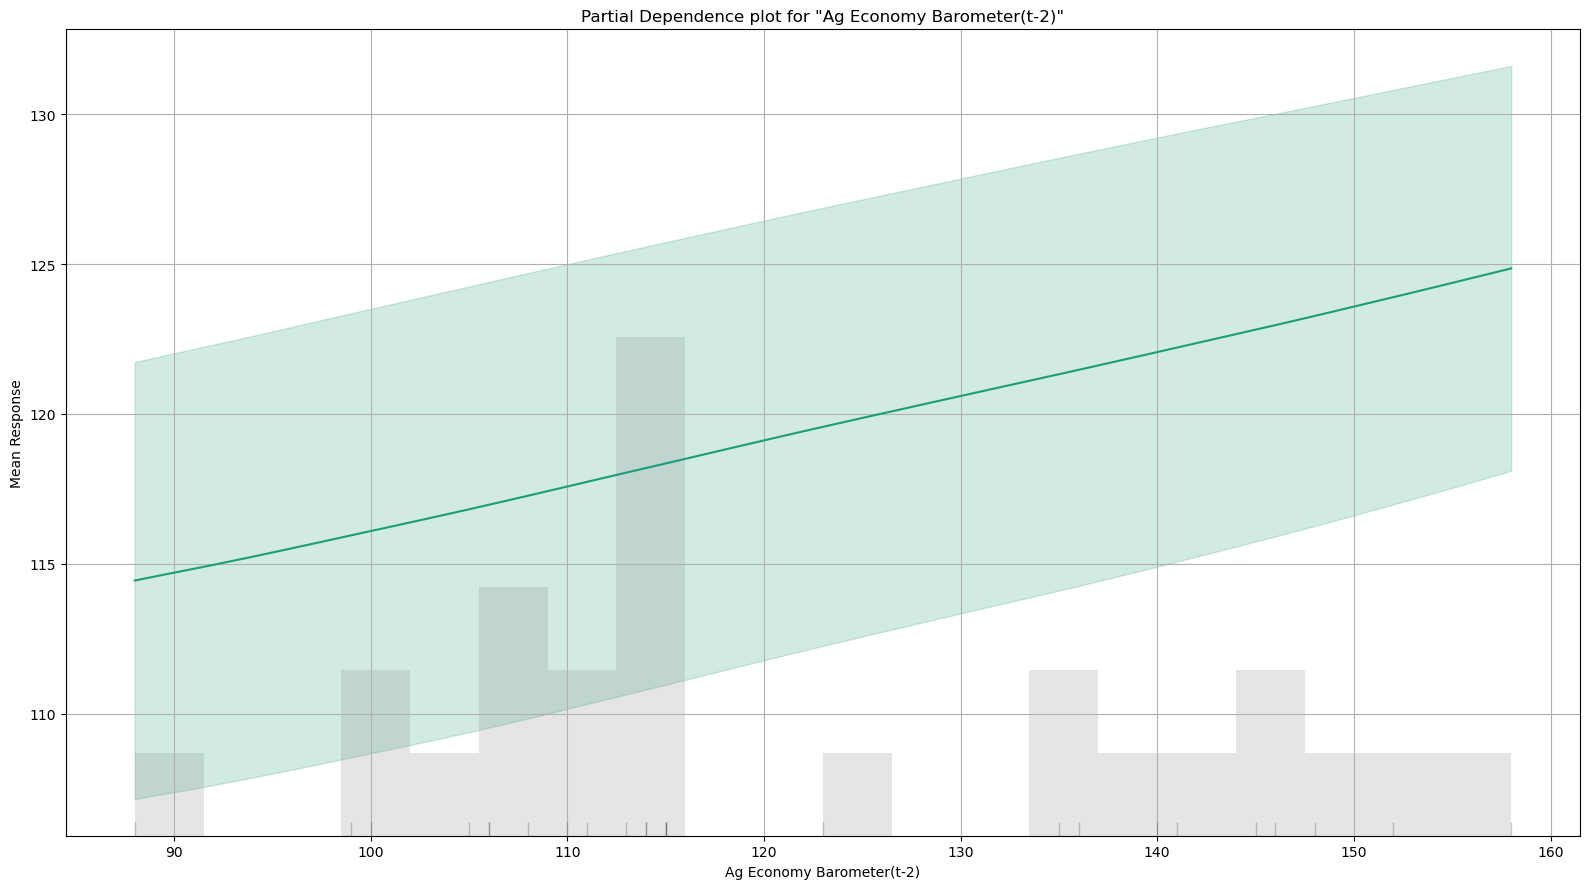

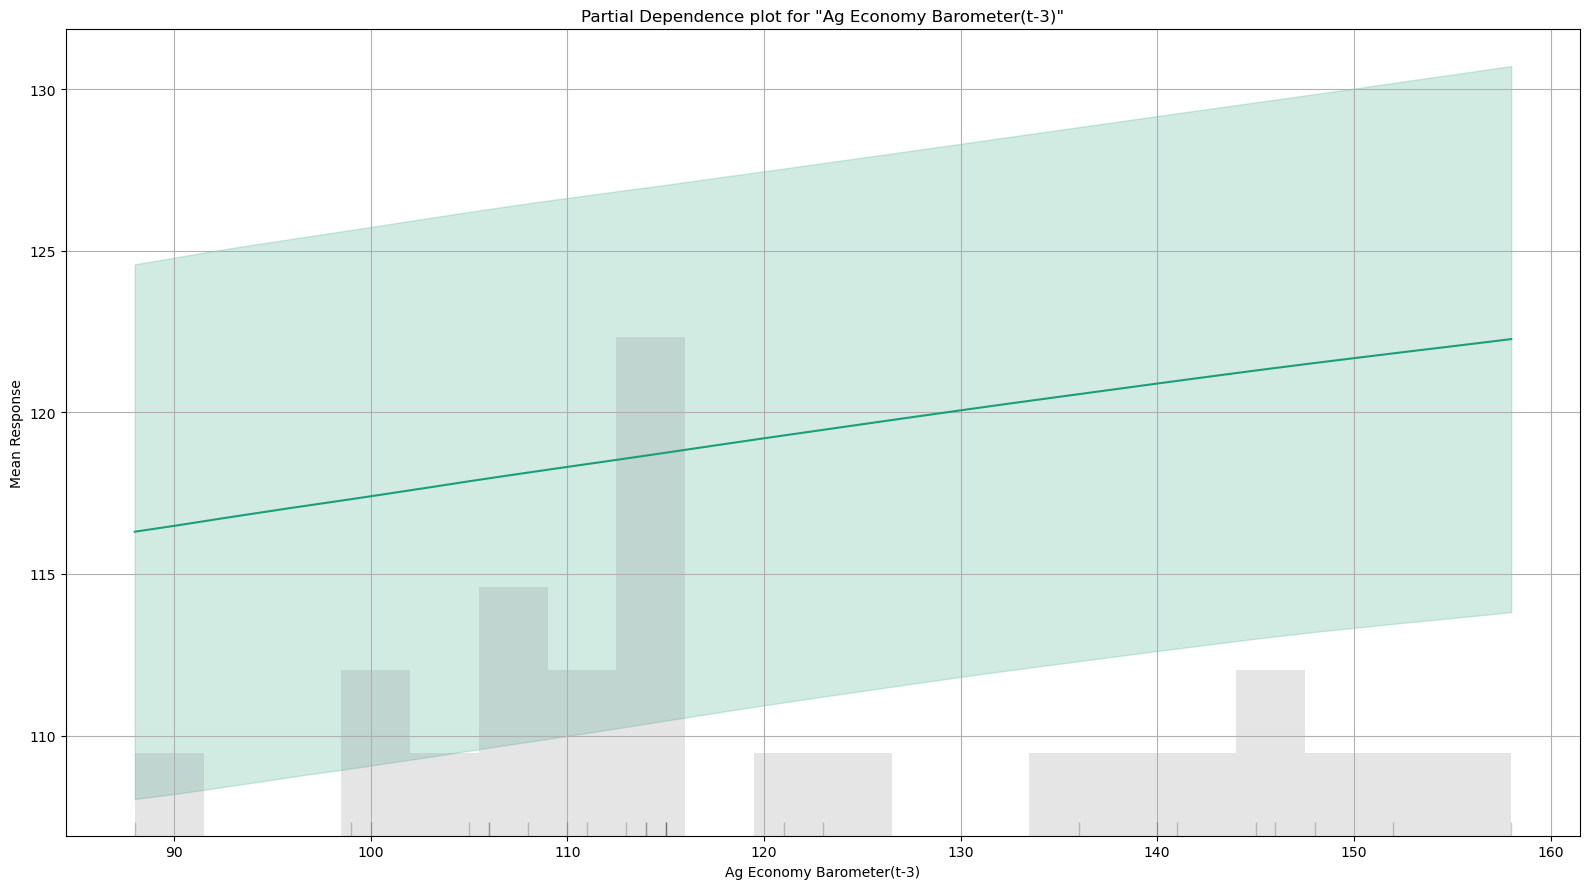

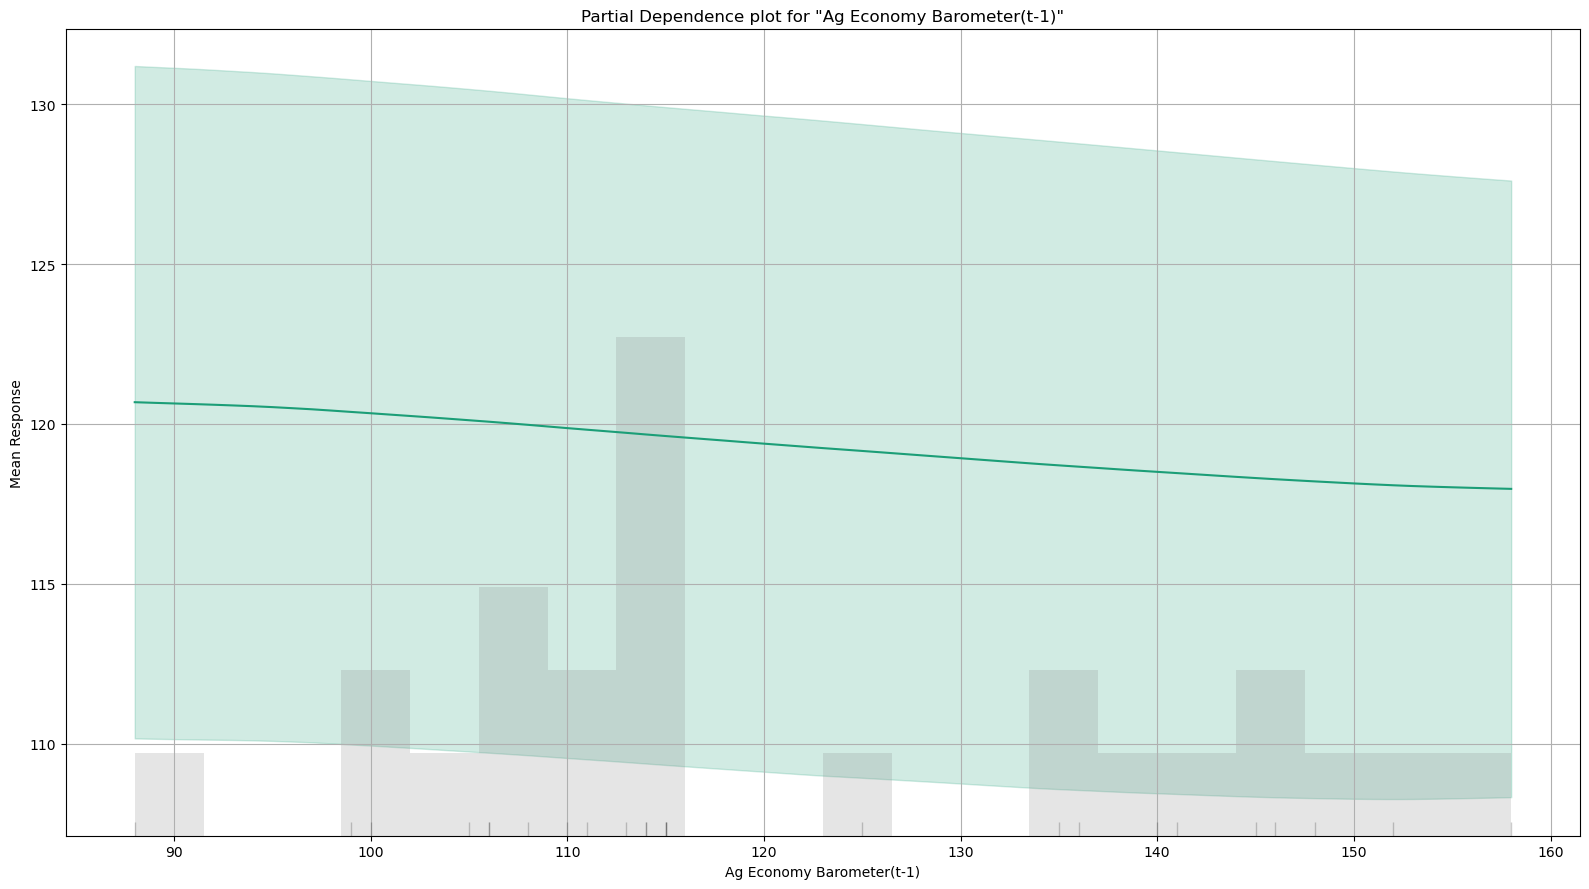

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

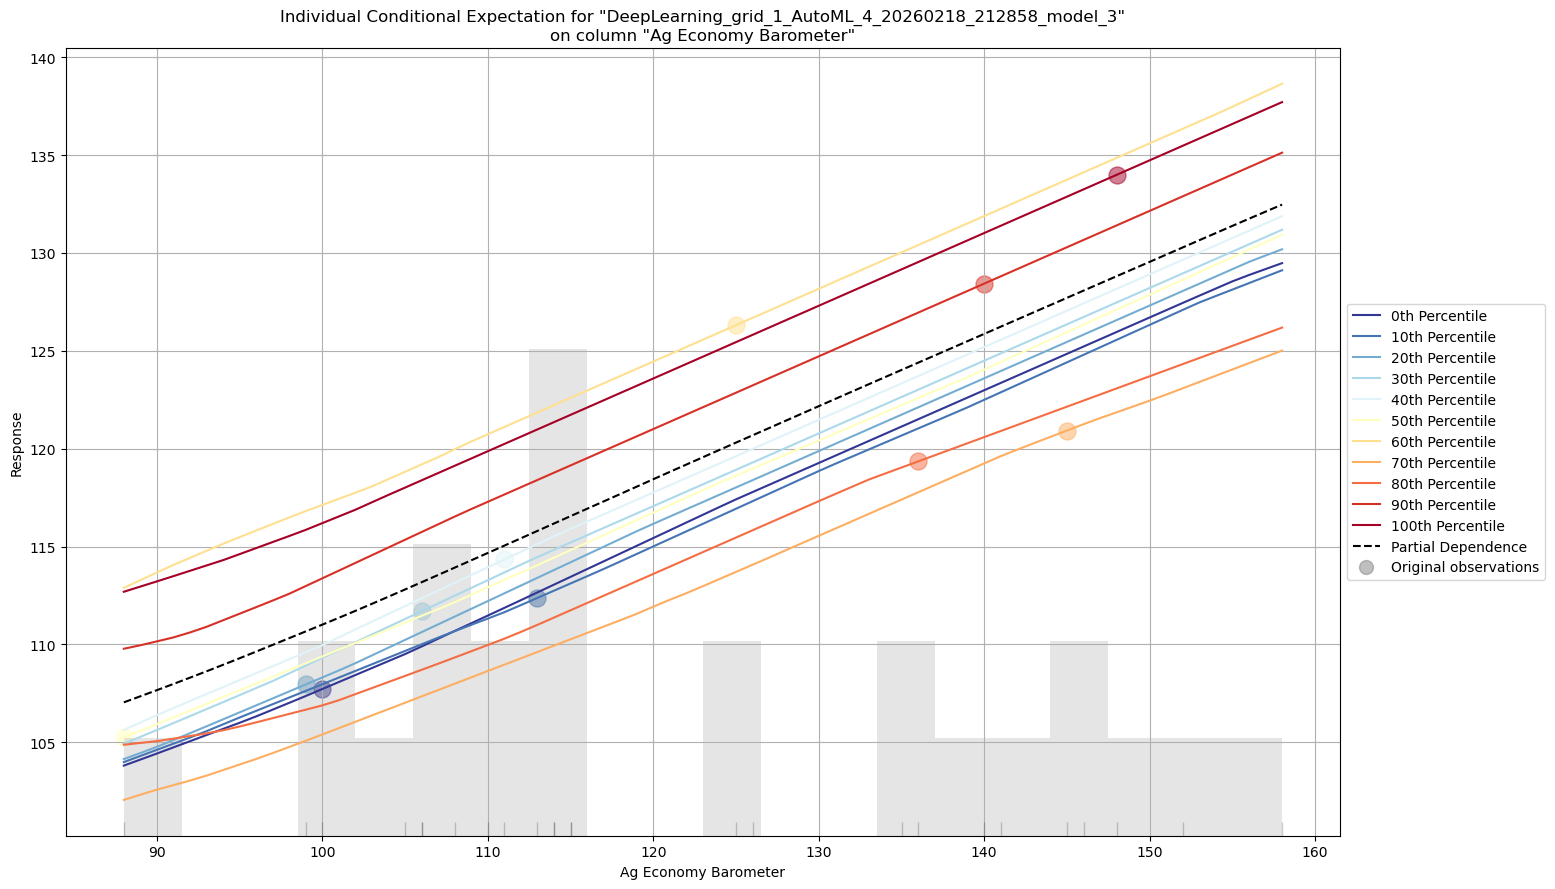

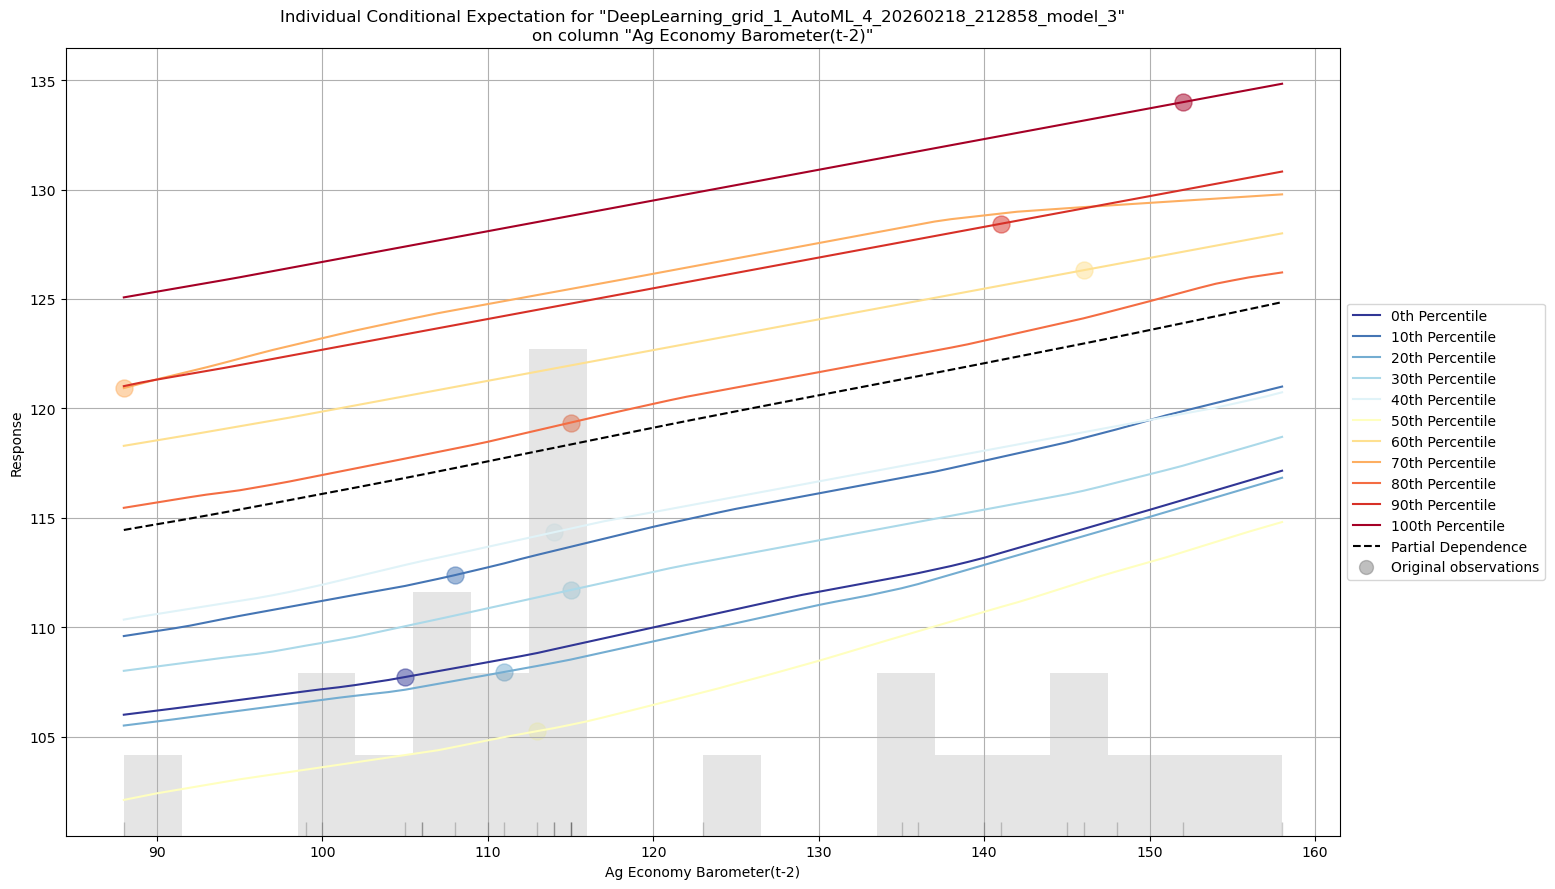

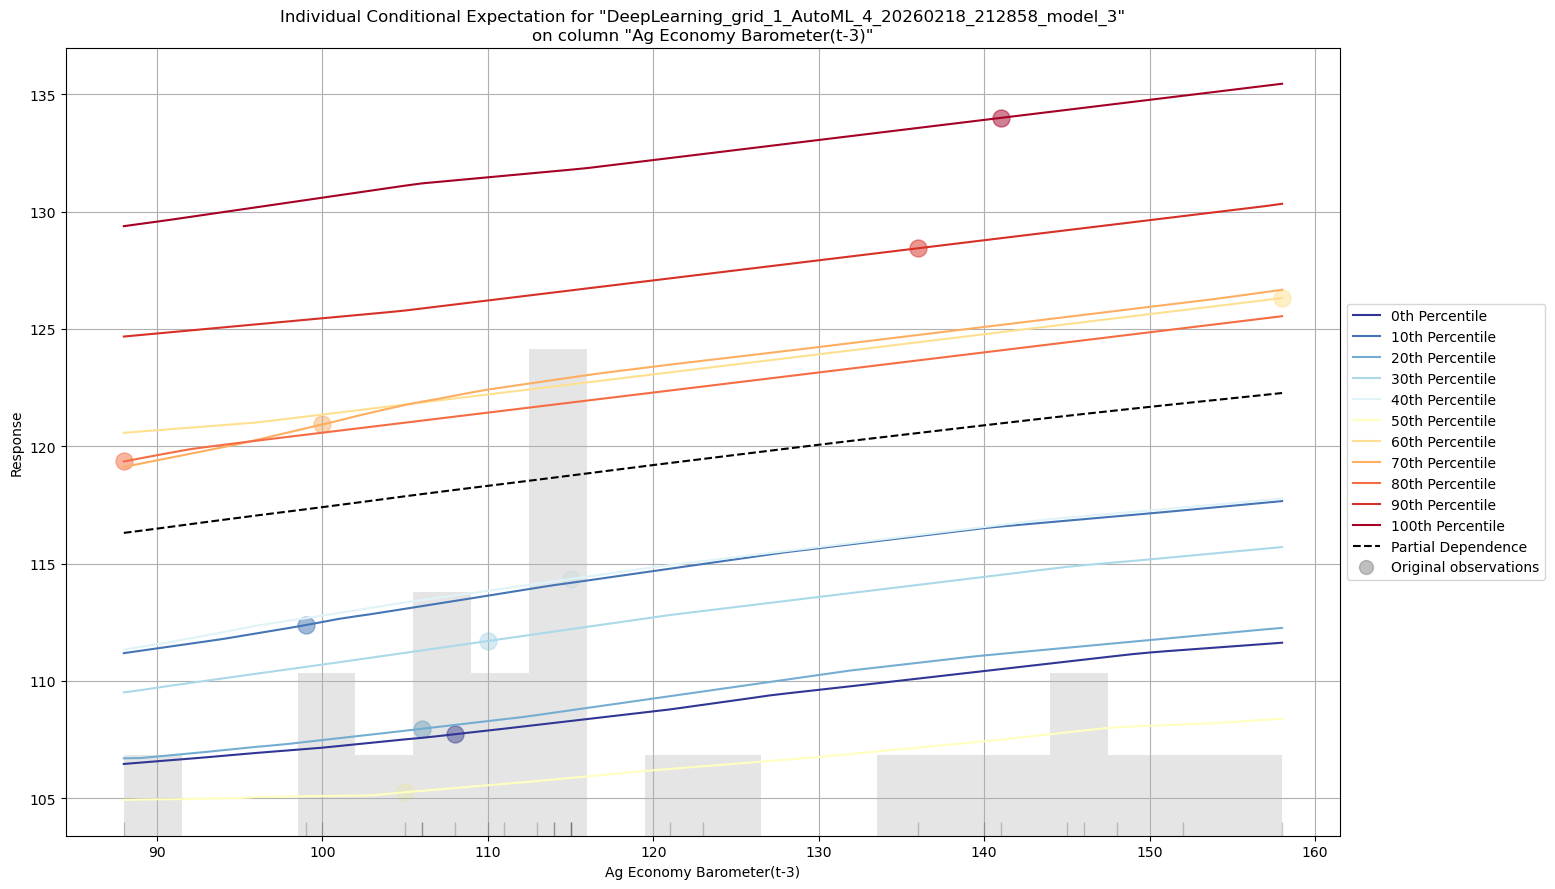

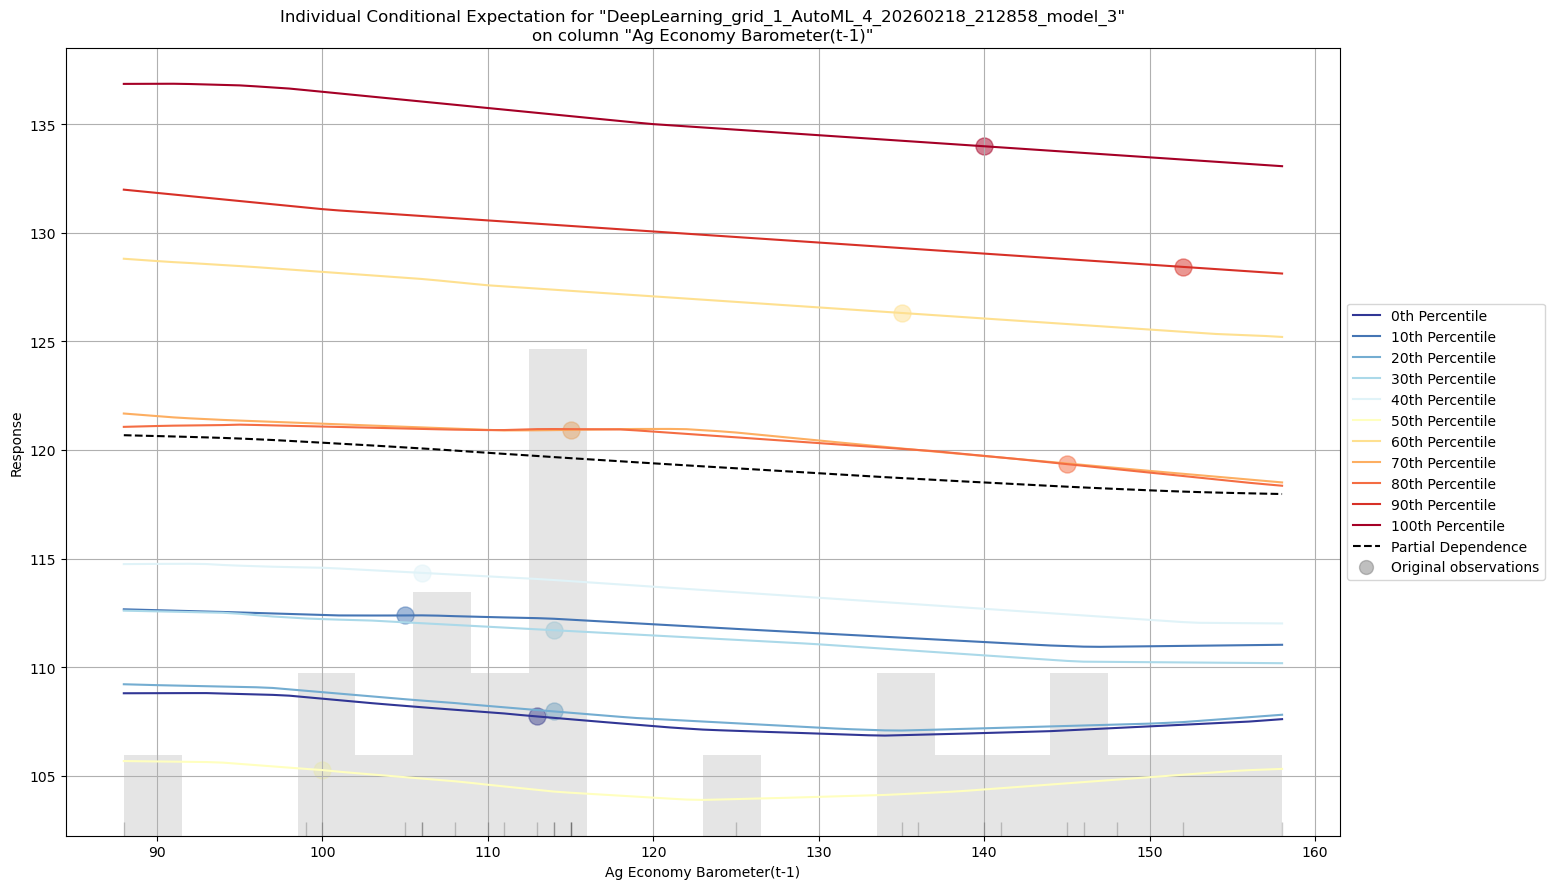

In [37]:
# ============================================================
# 6. SERIE 2 — Ag Economy Barometer (28 val / 28 test)
# ============================================================
aml2, perf2, results2, mape2 = run_automl_serie(
    serie=data2,
    nombre="Ag Economy Barometer",
    target_col="Ag Economy Barometer",
    n_lag=3, n_fut=1,
    n_val=24, n_test=25,
    max_runtime_secs=120
)



 AutoML — ICG UTDT
  Train: 168 | Val: 58 | Test: 58


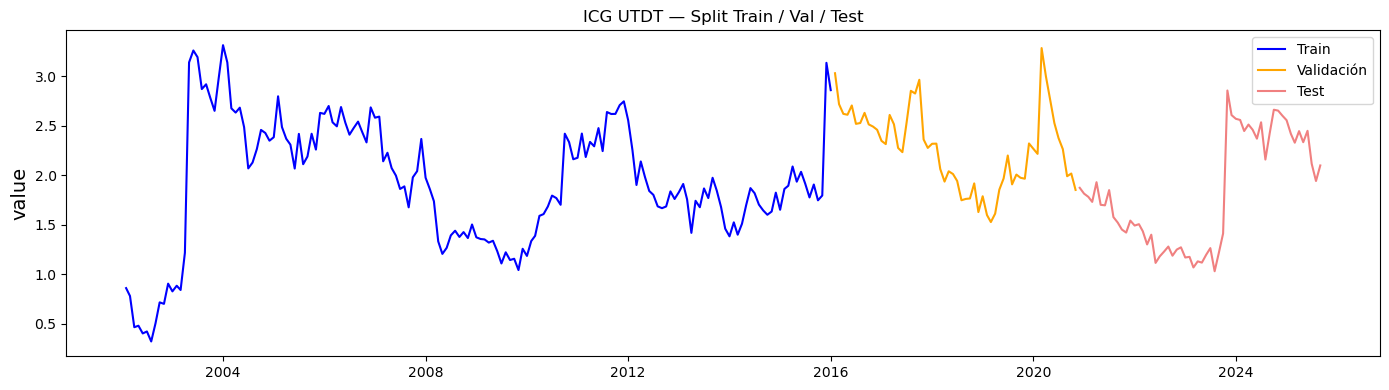

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:31:13.812: Project: AutoML_5_20260218_213113
21:31:13.812: Cross-validation disabled by user: no fold column nor nfolds > 1.
21:31:13.812: Setting stopping tolerance adaptively based on the training frame: 0.05
21:31:13.812: Build control seed: 42
21:31:13.813: training frame: Frame key: AutoML_5_20260218_213113_training_Key_Frame__upload_89133ff2bbed59ac565dfa8ed8da4025.hex    cols: 5    rows: 168  chunks: 1    size: 7060  checksum: -3762179017657114192
21:31:13.813: validation frame: Frame key: Key_Frame__upload_8edf60e3119af8472a898eb487d8433a.hex    cols: 5    rows: 58  chunks: 1    size: 2660  checksum: 5830627447066944080
21:31:13.813: leaderboard frame: Frame key: Key_Frame__up

c:\Users\nmengoni.WIENER-LAB\AppData\Local\miniconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


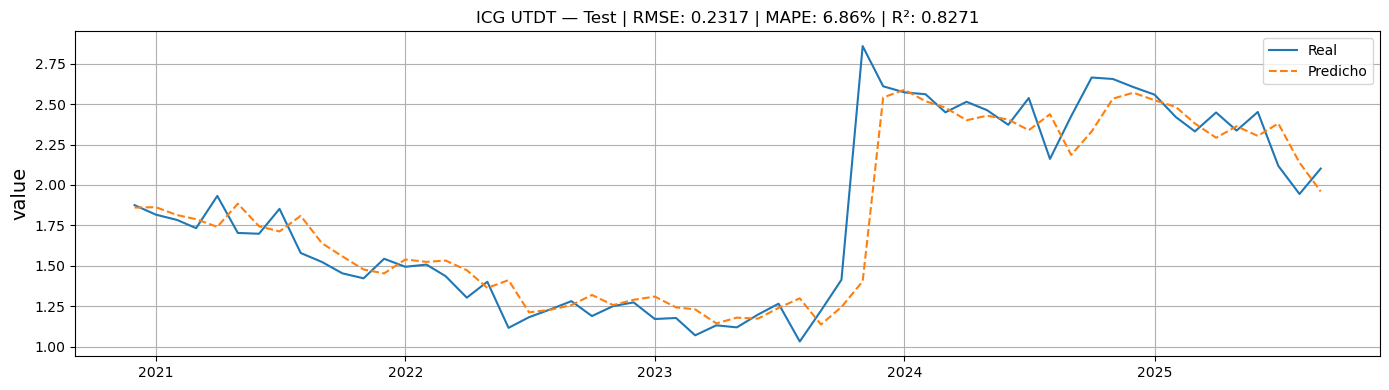

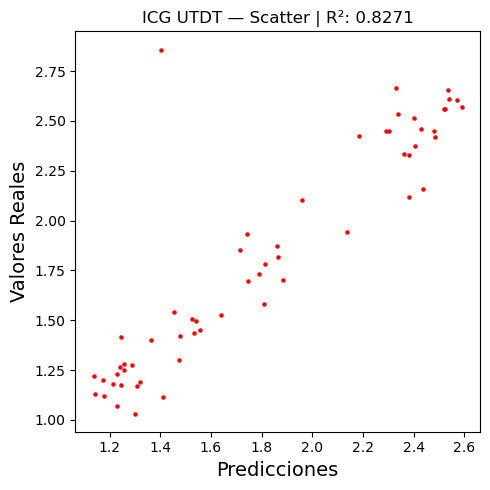

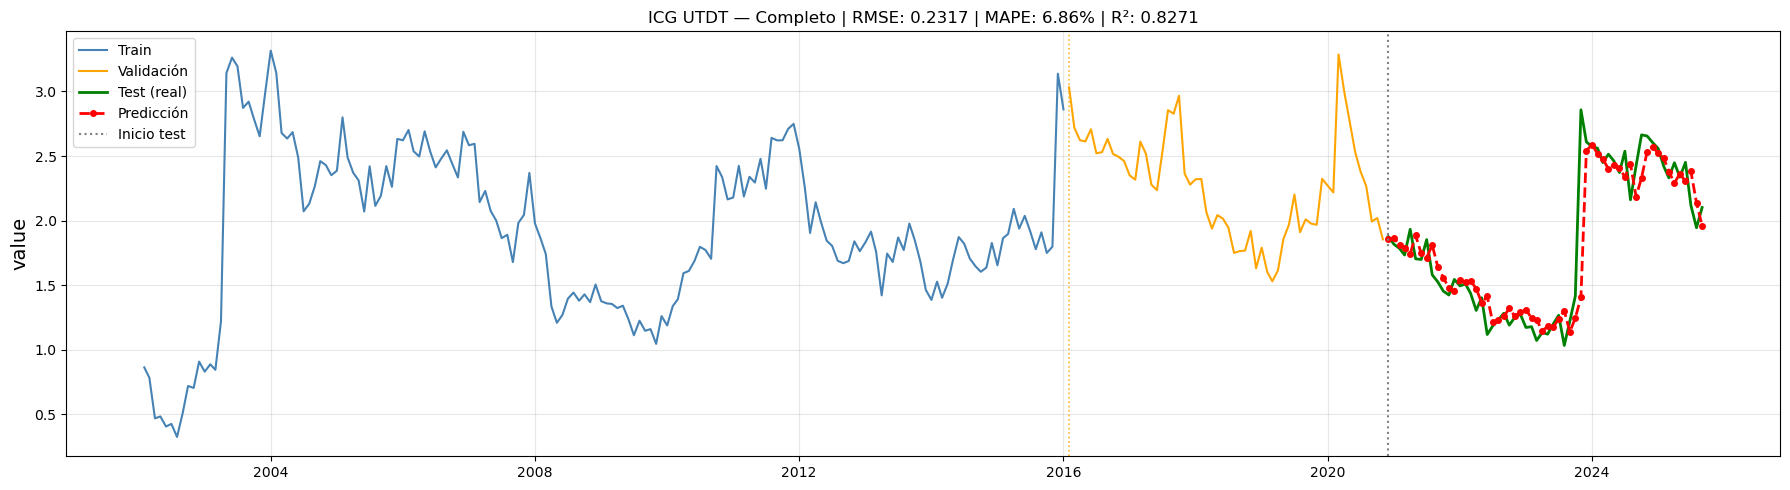


  Explicación del modelo ganador — ICG UTDT:


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

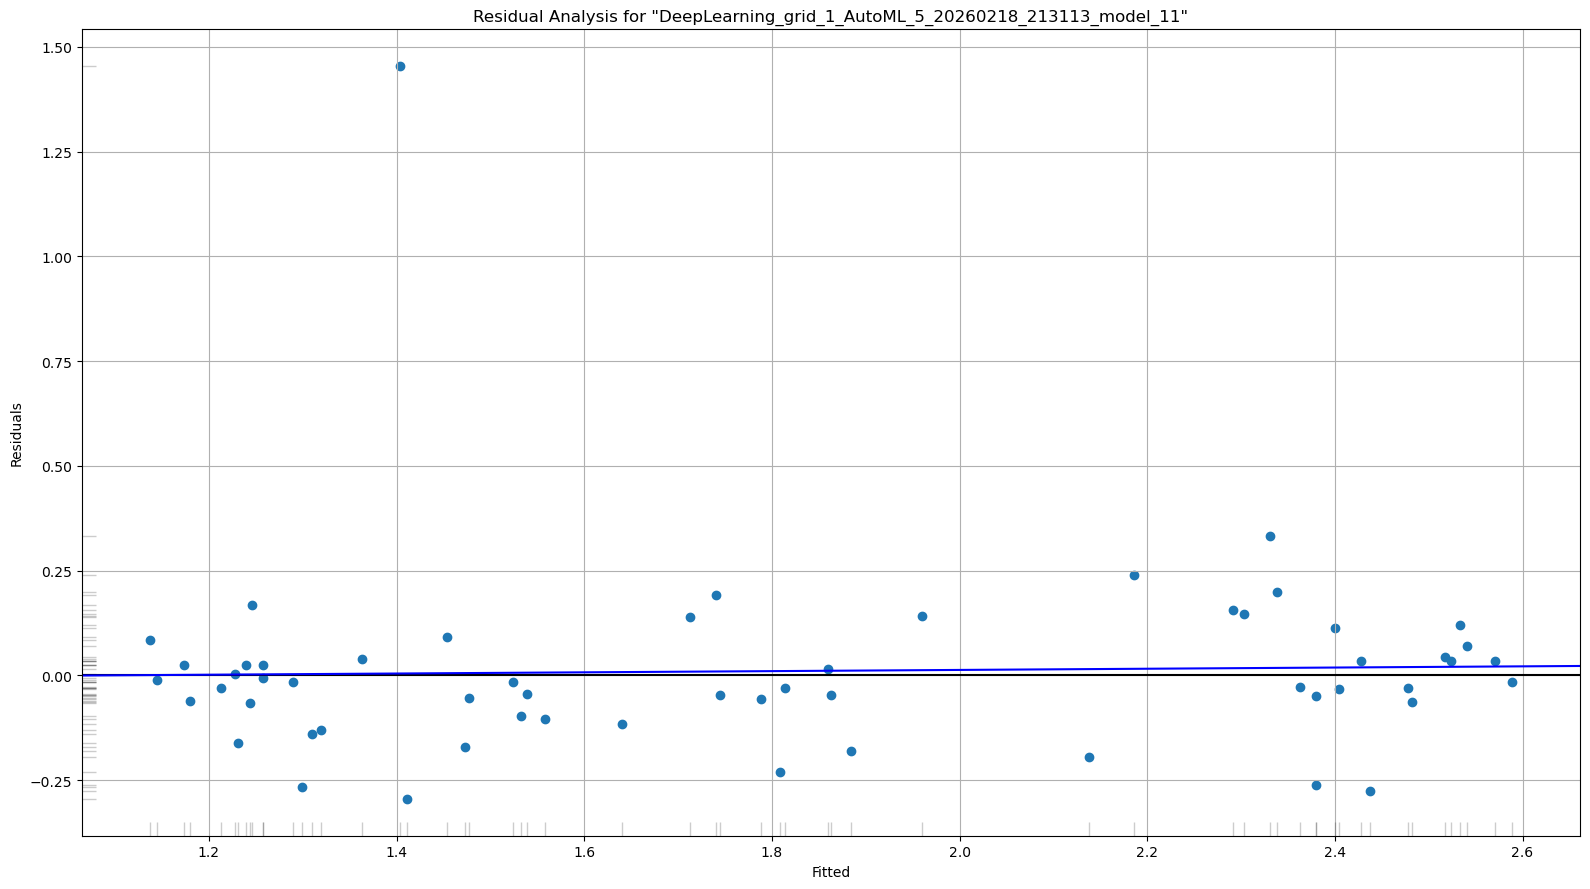

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

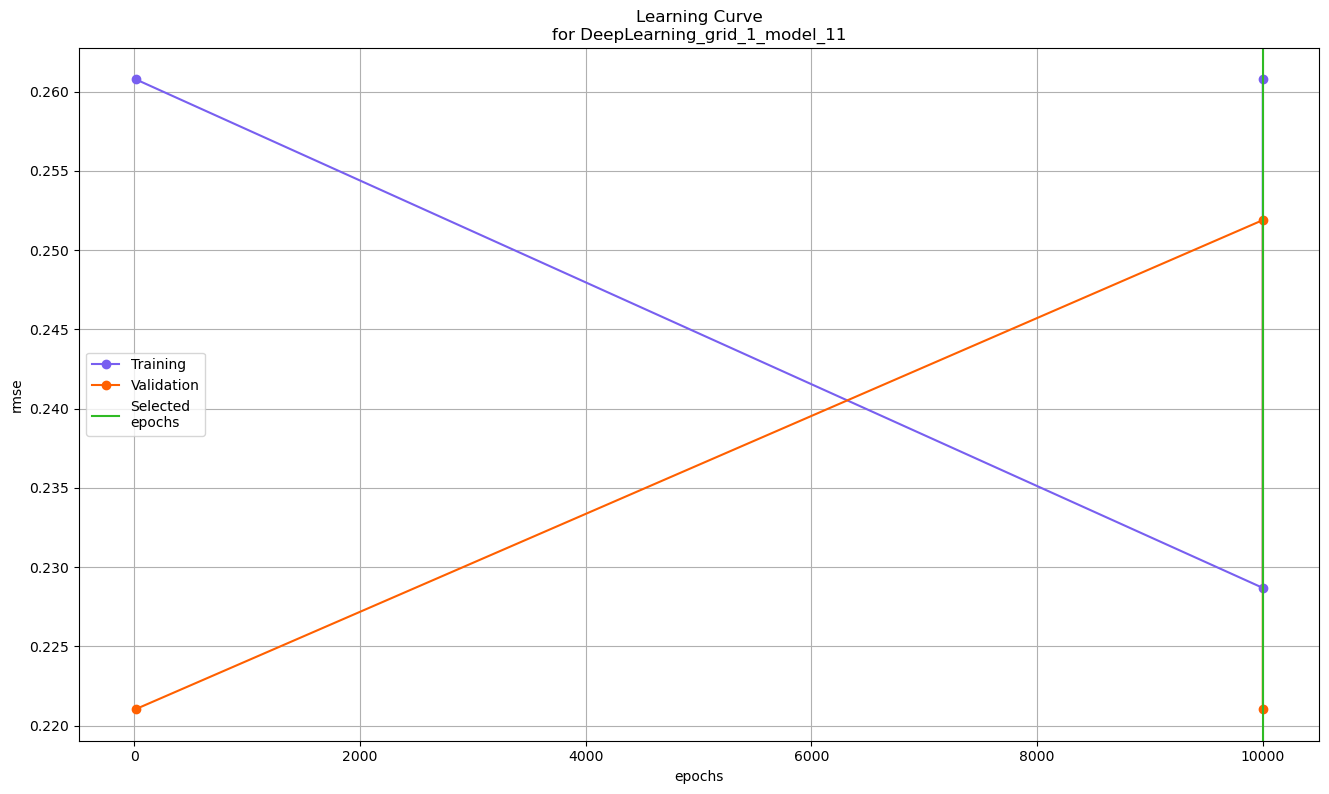

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

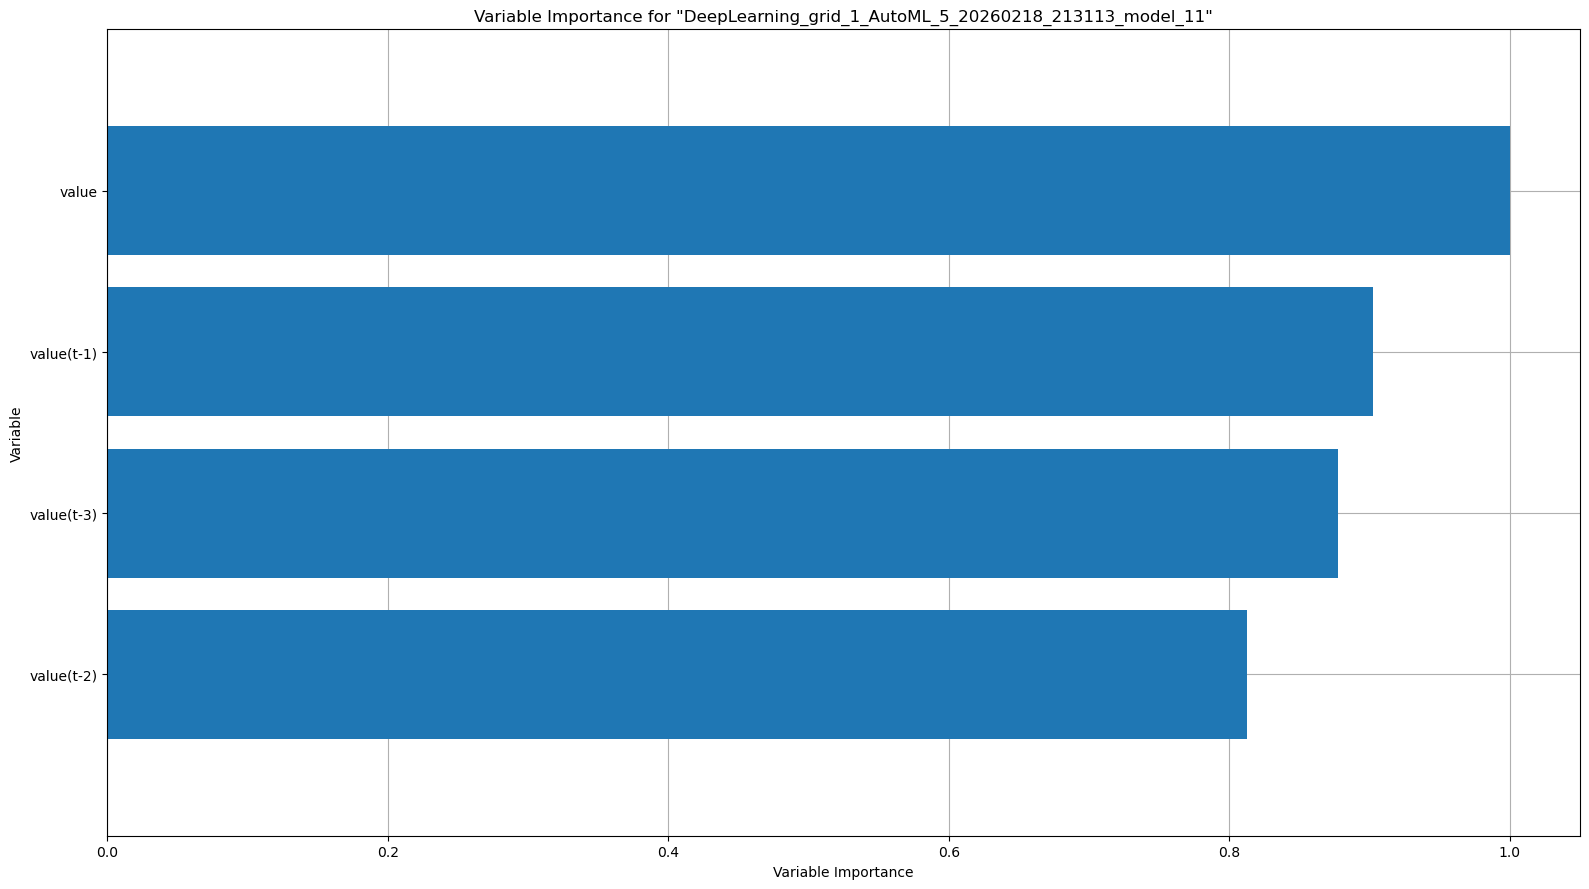

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

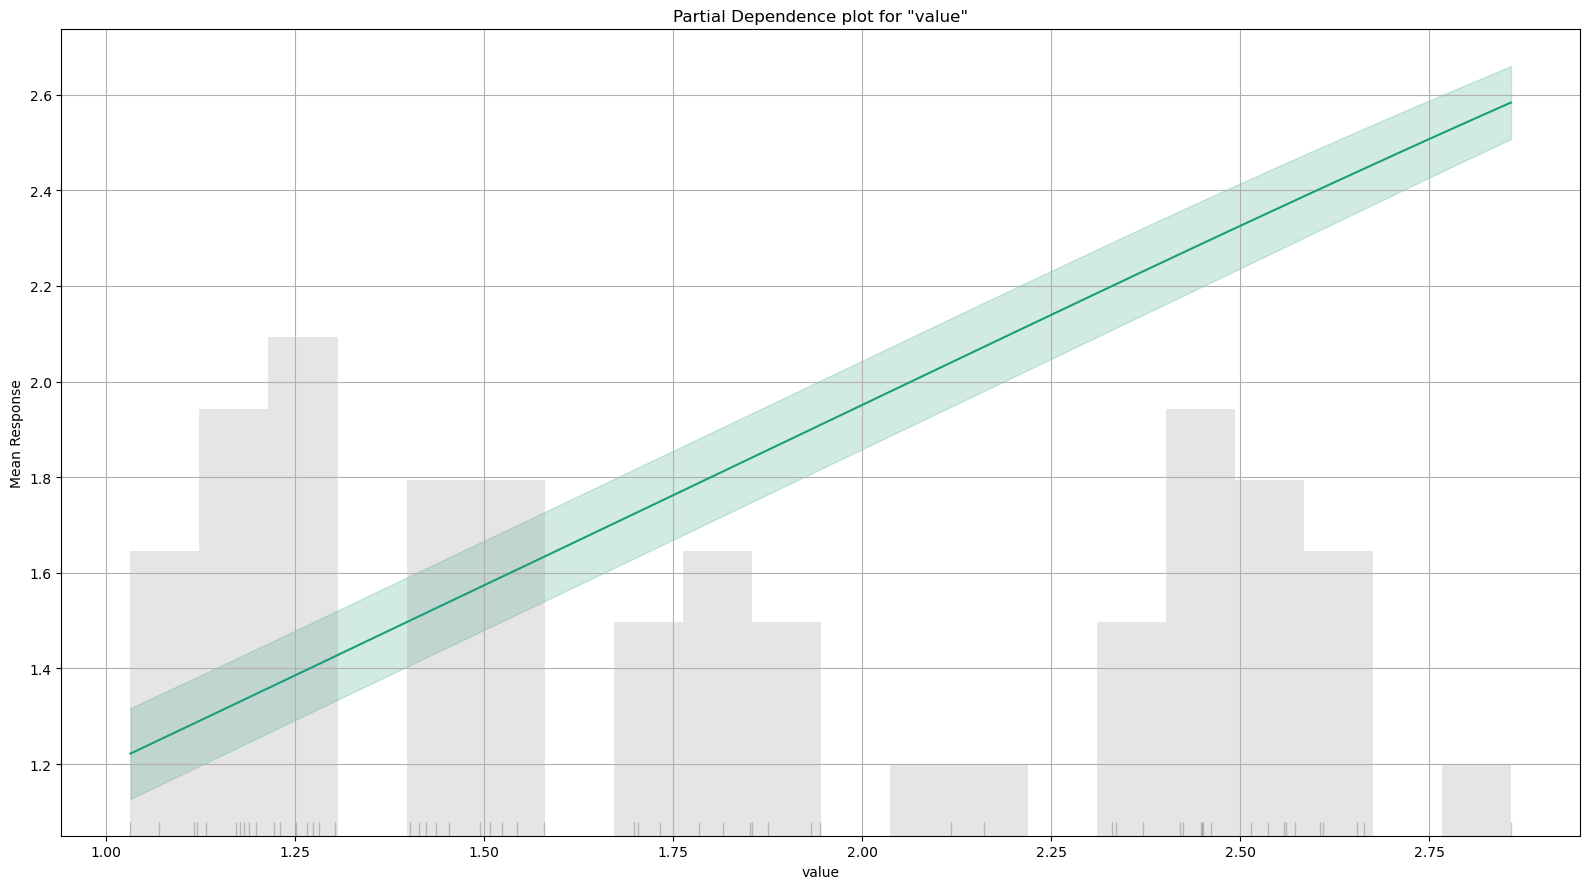

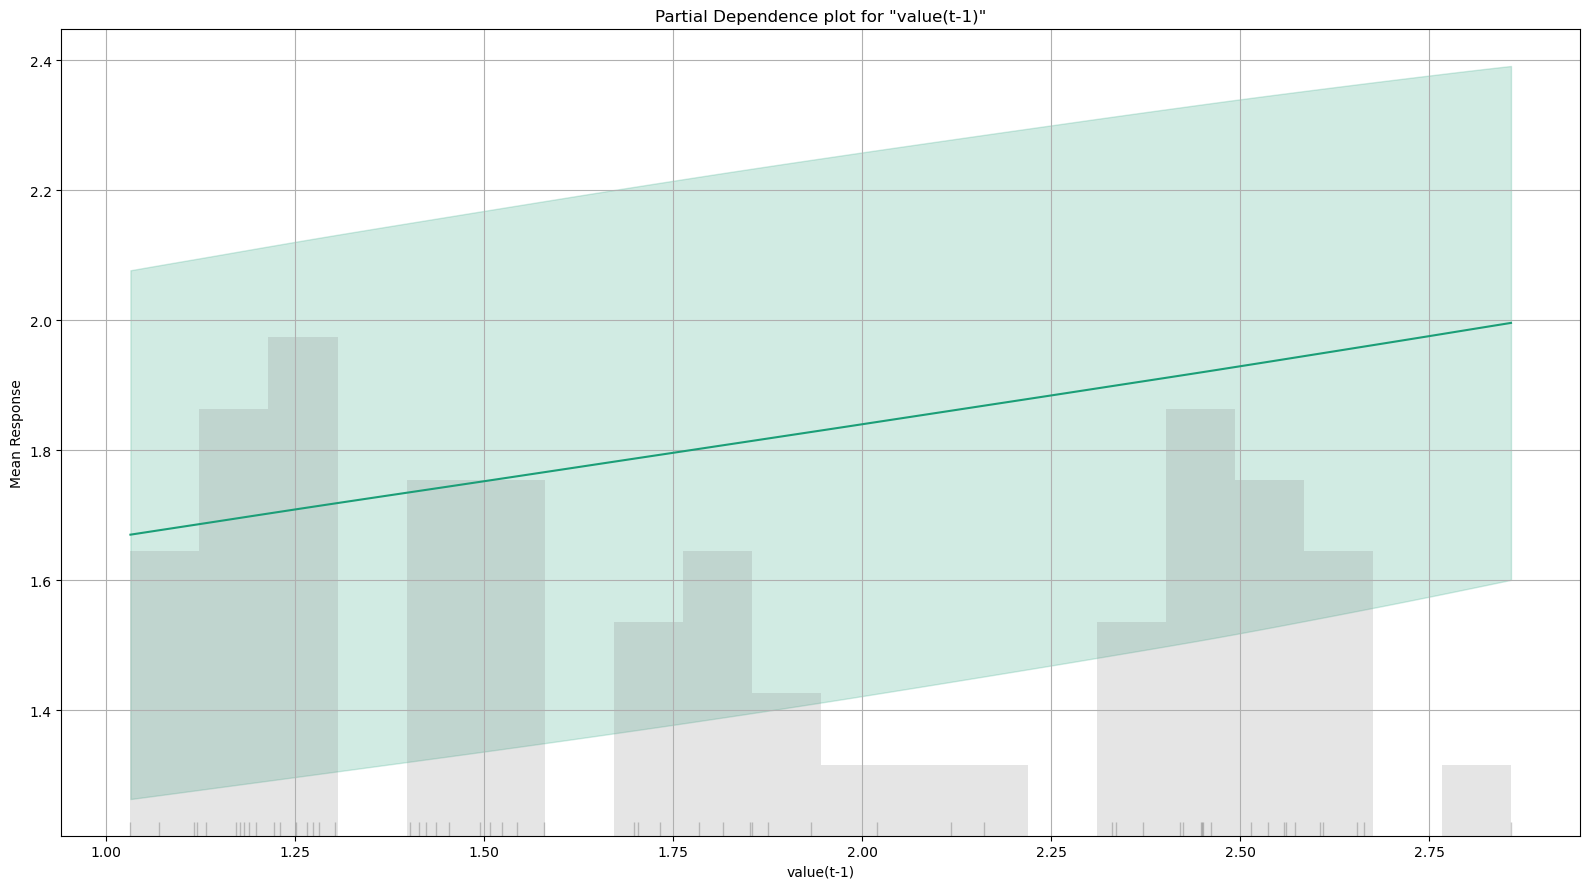

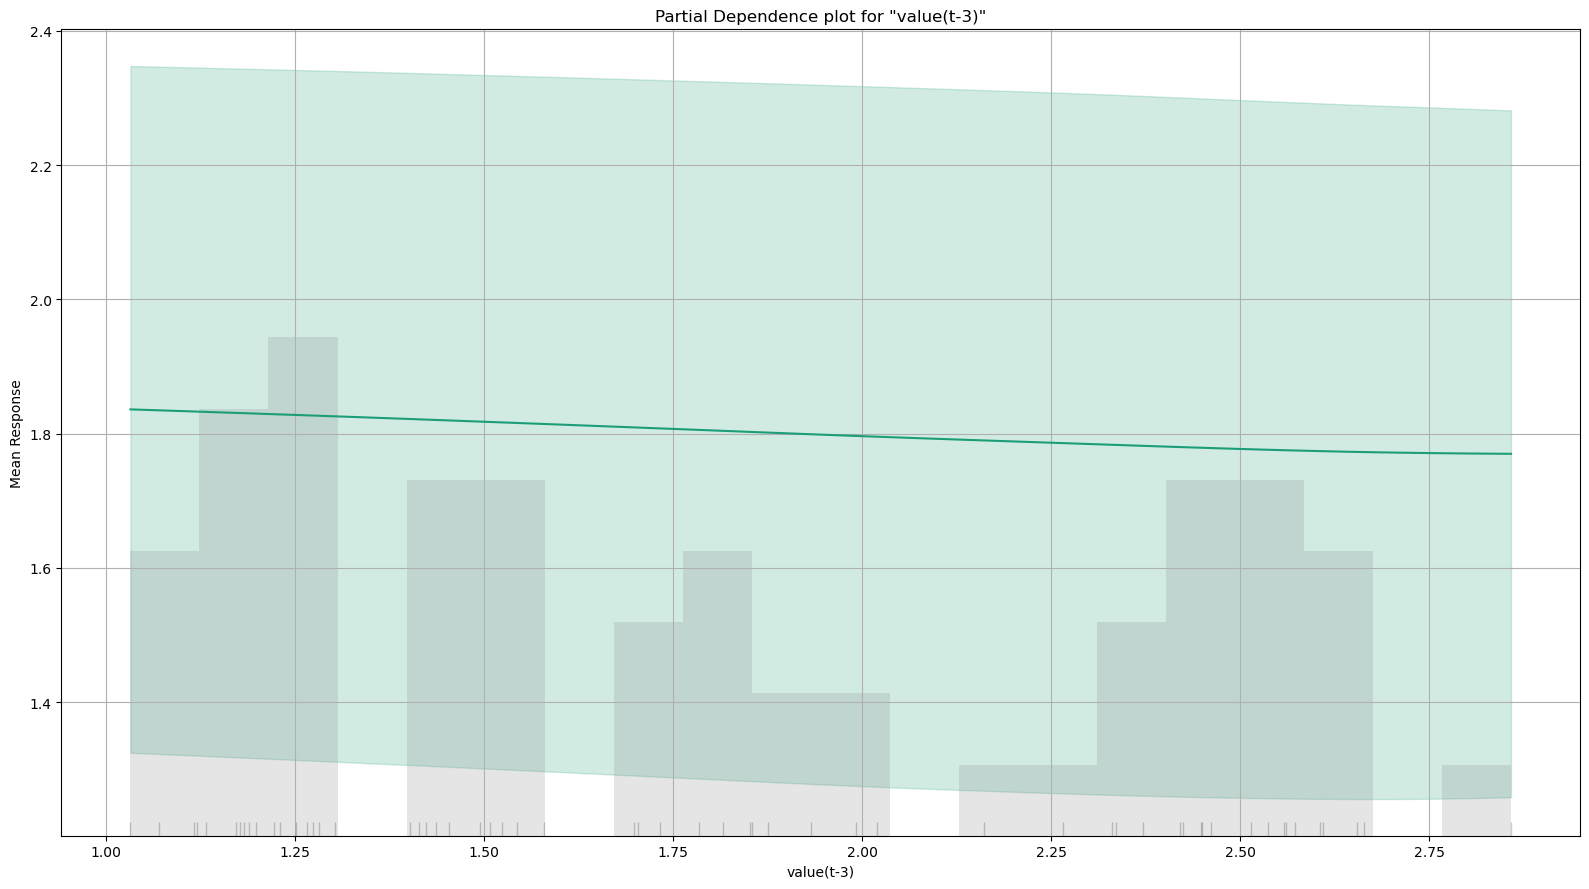

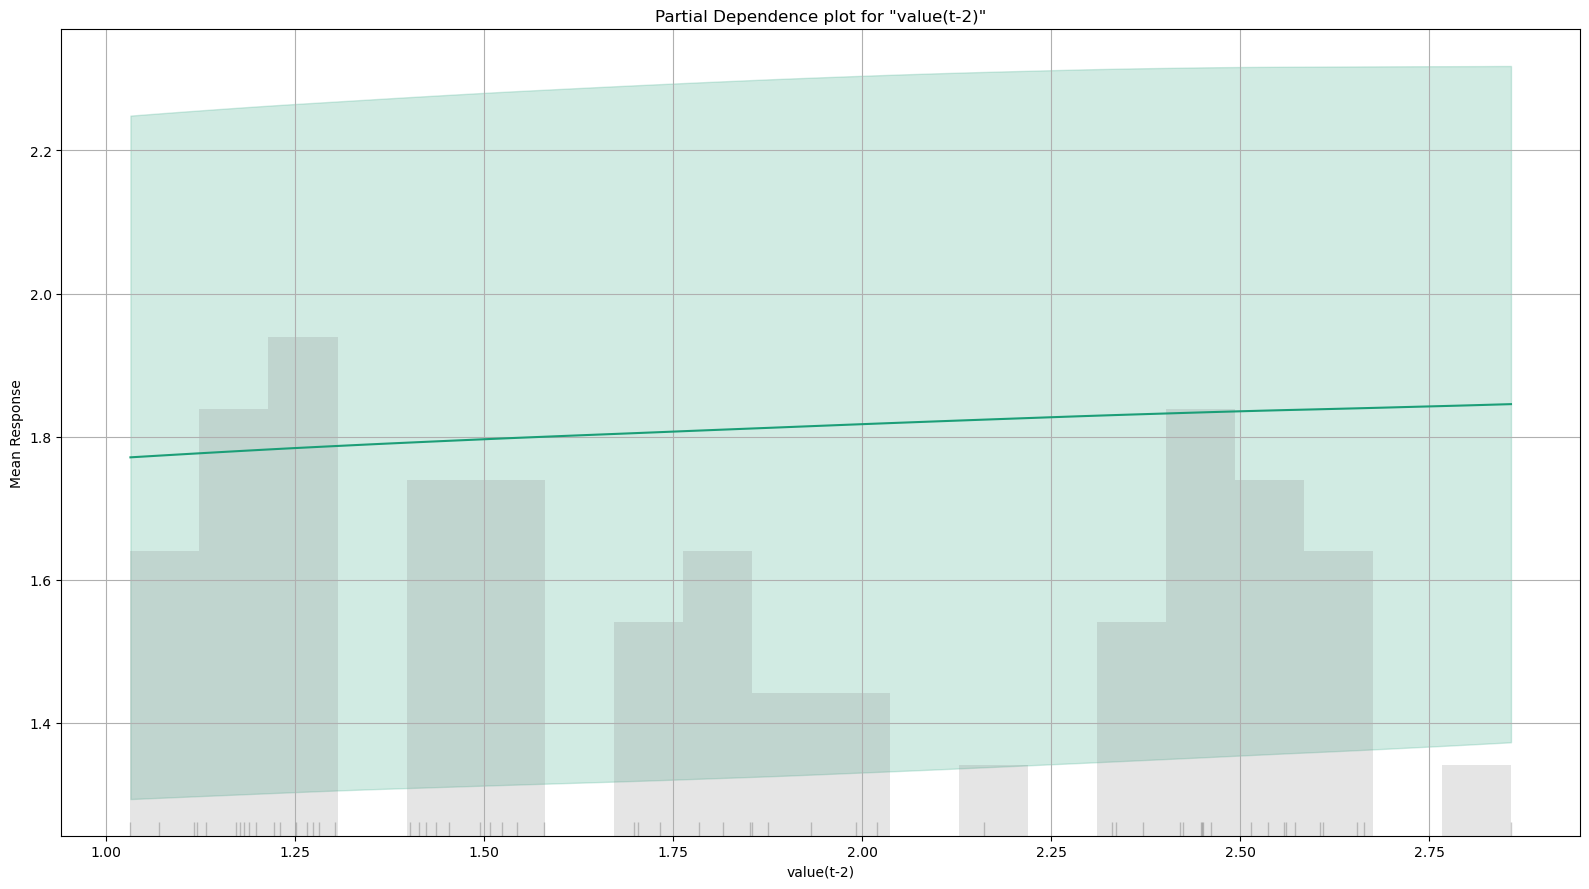

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

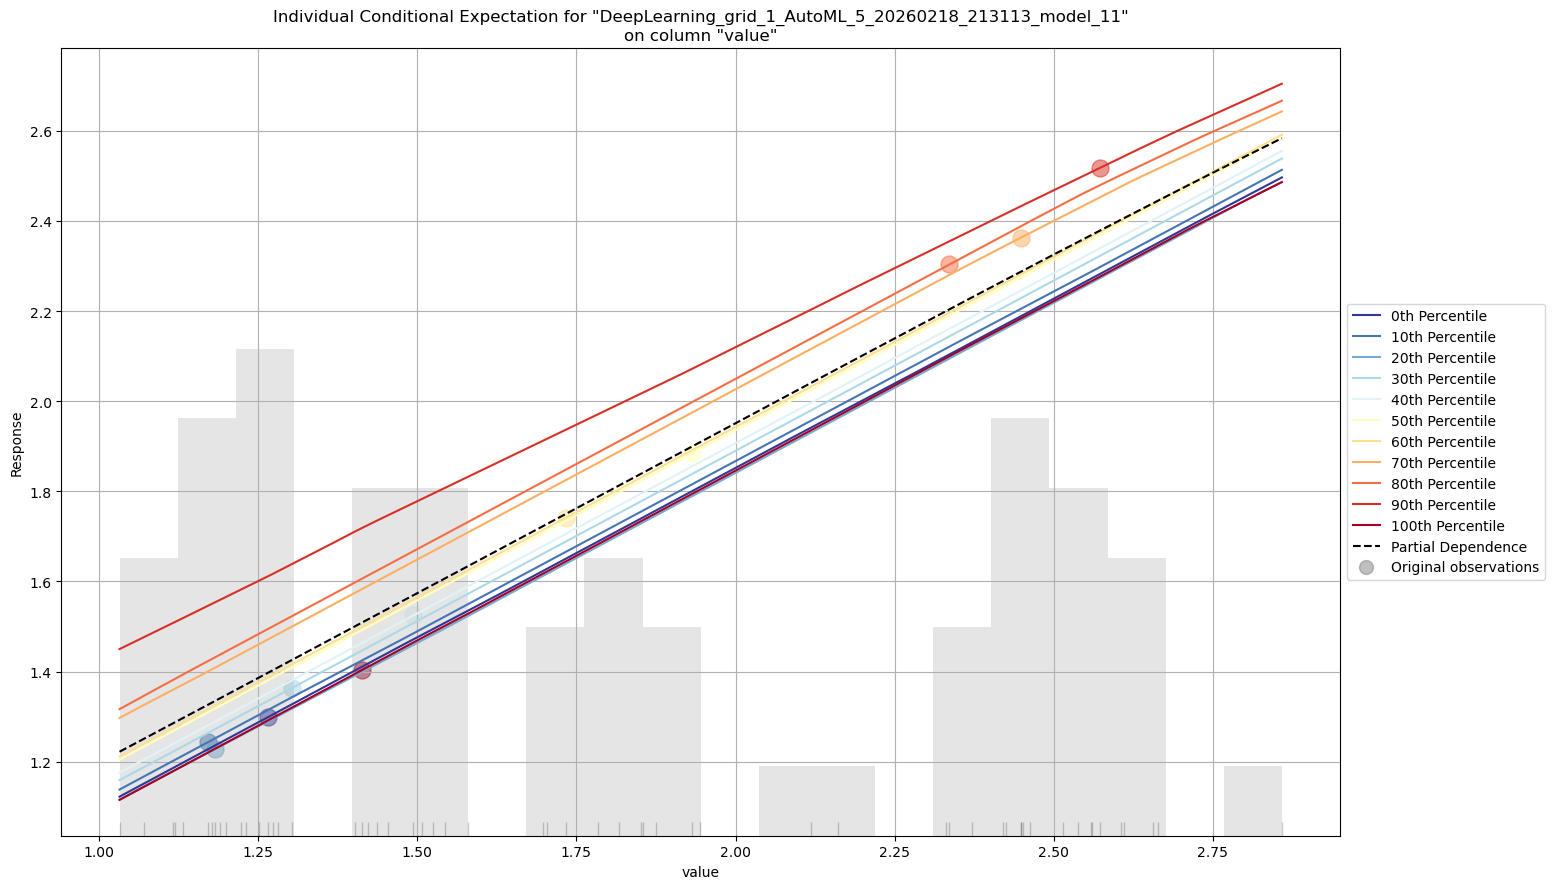

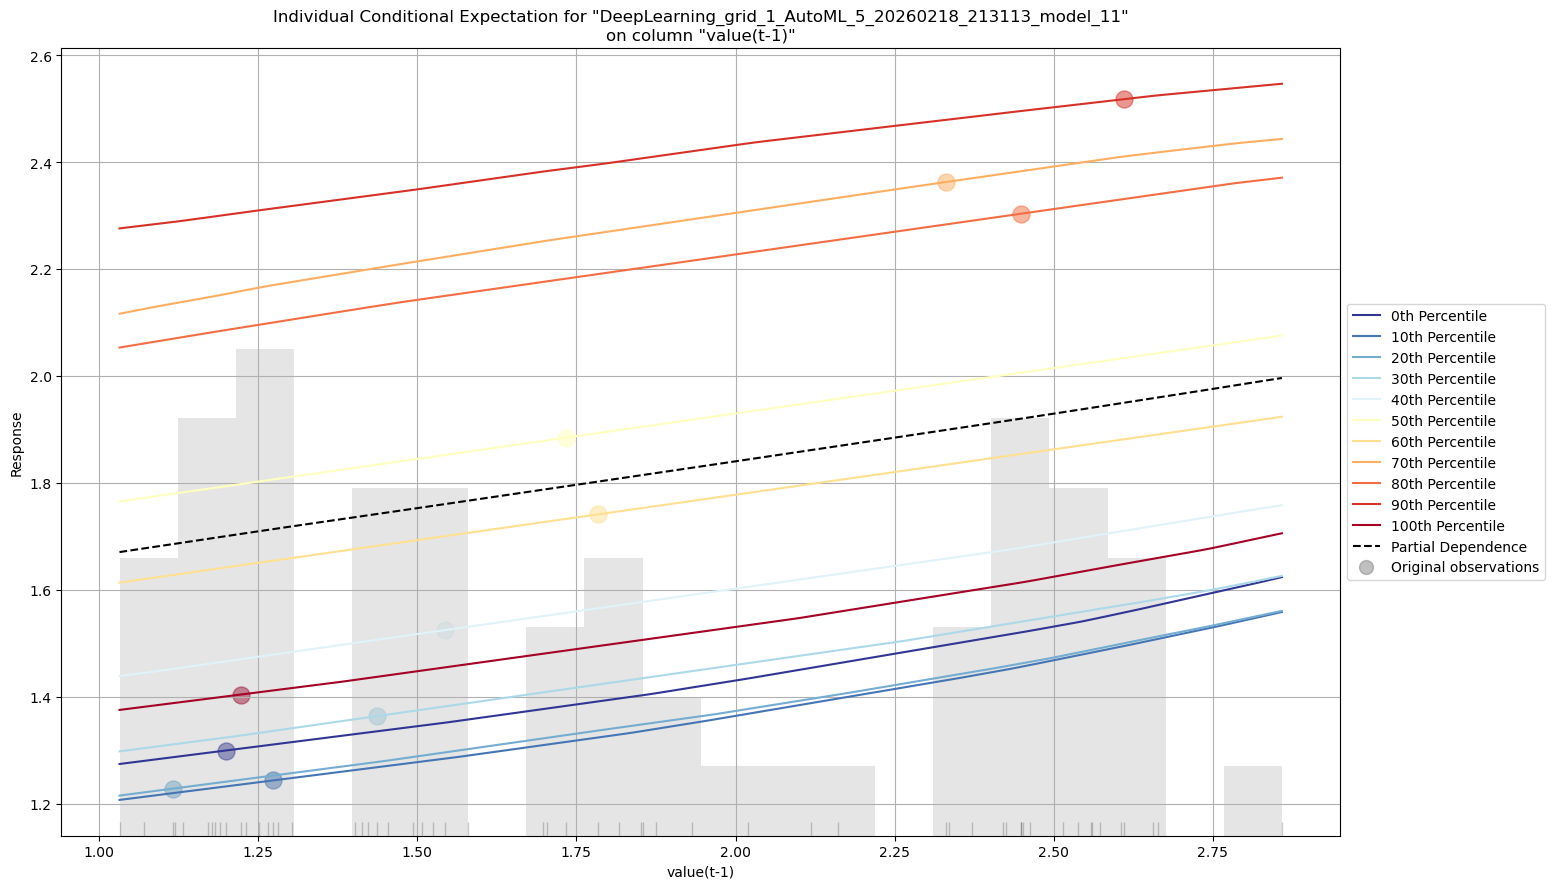

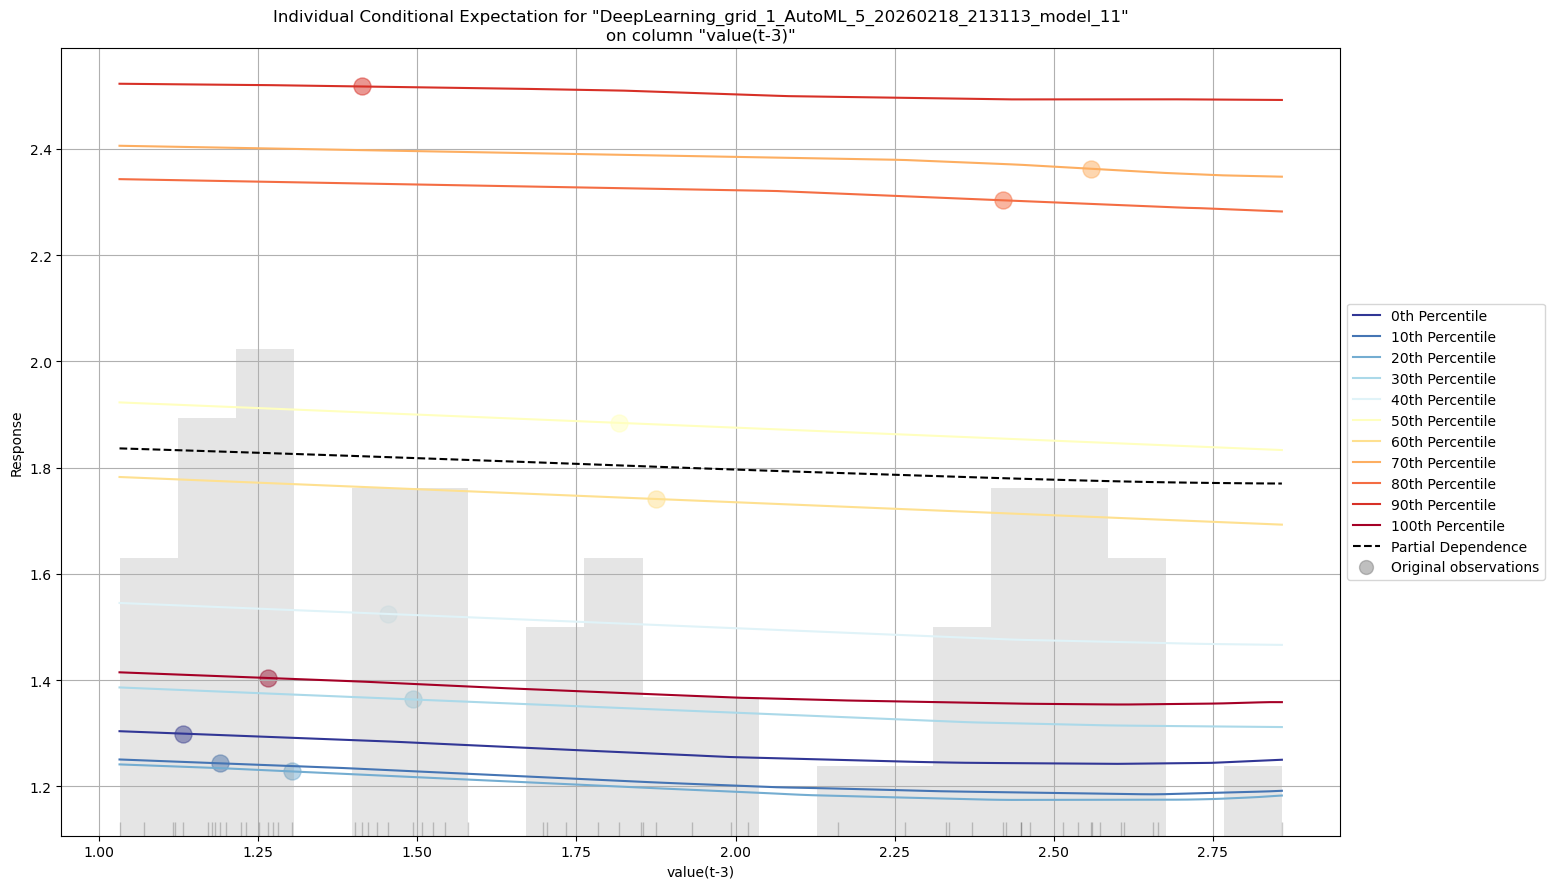

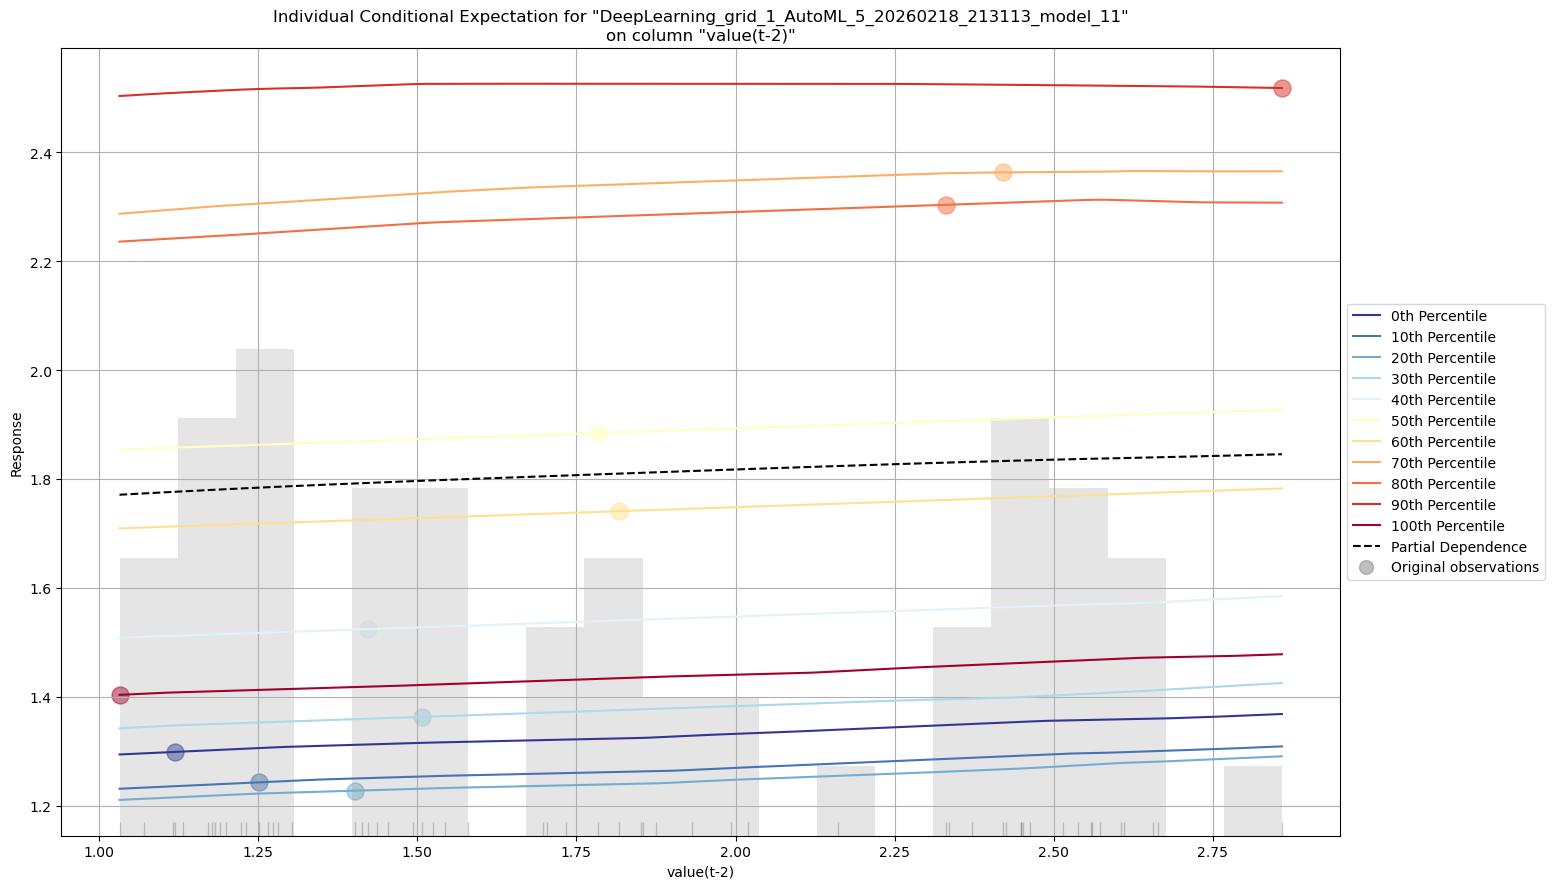

In [38]:
# ============================================================
# 7. SERIE 3 — ICG UTDT (24 val / 25 test)
# ============================================================
aml3, perf3, results3, mape3 = run_automl_serie(
    serie=data3,
    nombre="ICG UTDT",
    target_col="value",
    n_lag=3, n_fut=1,
    n_val=58, n_test=58,
    max_runtime_secs=120
)


========== RESUMEN FINAL ==========
               Serie      RMSE       MAE    MAPE %                                                Modelo
        Ag Barometer 16.119522 13.439071 10.412908 DeepLearning_grid_1_AutoML_3_20260218_212643_model_18
Ag Economy Barometer 13.260849  9.835696  7.785948  DeepLearning_grid_1_AutoML_4_20260218_212858_model_3
            ICG UTDT  0.231696  0.125010  6.863822 DeepLearning_grid_1_AutoML_5_20260218_213113_model_11


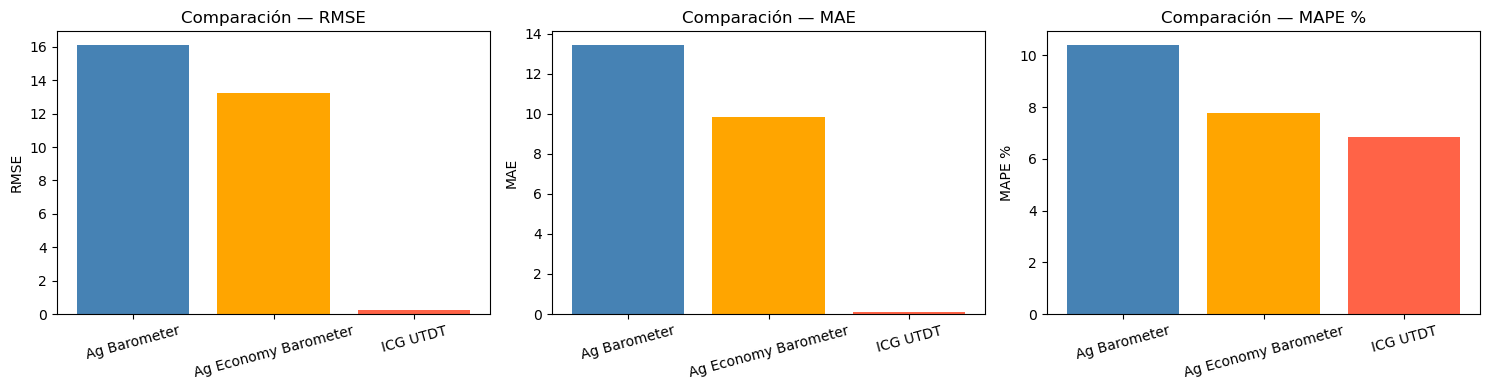

In [39]:
# ============================================================
# 8. RESUMEN COMPARATIVO
# ============================================================
resumen = pd.DataFrame({
    'Serie':   ["Ag Barometer", "Ag Economy Barometer", "ICG UTDT"],
    'RMSE':    [perf1.rmse(),  perf2.rmse(),  perf3.rmse()],
    'MAE':     [perf1.mae(),   perf2.mae(),   perf3.mae()],
    'MAPE %':  [mape1,         mape2,         mape3],
    'Modelo':  [aml1.leader.model_id, aml2.leader.model_id, aml3.leader.model_id]
})

print("\n========== RESUMEN FINAL ==========")
print(resumen.to_string(index=False))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colores = ['steelblue', 'orange', 'tomato']

for ax, metrica in zip(axes, ['RMSE', 'MAE', 'MAPE %']):
    ax.bar(resumen['Serie'], resumen[metrica], color=colores)
    ax.set_title(f"Comparación — {metrica}")
    ax.set_ylabel(metrica)
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# h2o.shutdown(prompt=False)